# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Import the libraries you will be using for analysis

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
!pip install pyarrow

   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.3 MB ? eta -:--:--
    --------------------------------------- 0.5/25.3 MB 598.5 kB/s eta 0:00:42
   - -------------------------------------- 0.8/25.3 MB 838.9 kB/s eta 0:00:30
   - -------------------------------------- 1.0/25.3 MB 838.4 kB/s eta 0:00:29
   - -------------------------------------- 1.0/25.3 MB 838.4 kB/s eta 0:00:29
   - -------------------------------------- 1.0/25.3 MB 838.4 kB/s eta 0:00:29
   -- ------------------------------------- 1.3/25.3 MB 713.8 kB/s eta 0:00:34
   -- ------------------------------------- 1.3/25.3 MB 713.8 kB/s eta 0:00:34
   -- ------------------------------------- 1.3/25.3 MB 713.8 kB/s eta 0:00:34
   -- ------------------------------------- 1.6/25.3 MB 630.8 kB/s eta 0:00:38
   -- ---

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file
df1=pd.read_parquet(r"C:\Users\aniru\Desktop\Upgrad IIIT AI\Course 1_ SQL and Stats\M7 EDA Assignmnet NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\Users\aniru\Desktop\Upgrad IIIT AI\Course 1_ SQL and Stats\M7 EDA Assignmnet NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing {file_name}...")
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        first_df=pd.read_parquet(file_path)
        first_df["year"]=first_df['tpep_pickup_datetime'].dt.year
        month_df=first_df[first_df['year']==2023].copy()
                # Ensure datetime format
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])

        # Create date and hour columns
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour
        



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for day in month_df["date"].unique():
            day_df=month_df[month_df["date"]==day]

            # Iterate through each hour of the selected date
            for hr in day_df["hour"].unique():
                hourly_df=day_df[day_df["hour"]==hr]
                
                if not hourly_df.empty:
                    # Sample 5% of the hourly data randomly
                    sampled_hour = hourly_df.sample(frac=0.05, random_state=42)
                     # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sampled_hour], ignore_index=True)
                    
                    
                

               

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data],ignore_index=True)
        print(f"Done with {file_name} ✔")
        print(f"\n Sampling complete! Final dataset shape: {df.shape}")


    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing 2023-1.parquet...
Done with 2023-1.parquet ✔

 Sampling complete! Final dataset shape: (152086, 22)
Processing 2023-10.parquet...
Done with 2023-10.parquet ✔

 Sampling complete! Final dataset shape: (326341, 23)
Processing 2023-11.parquet...
Done with 2023-11.parquet ✔

 Sampling complete! Final dataset shape: (491474, 23)
Processing 2023-12.parquet...
Done with 2023-12.parquet ✔

 Sampling complete! Final dataset shape: (658183, 23)
Processing 2023-2.parquet...
Done with 2023-2.parquet ✔

 Sampling complete! Final dataset shape: (826879, 23)
Processing 2023-3.parquet...
Done with 2023-3.parquet ✔

 Sampling complete! Final dataset shape: (990665, 23)
Processing 2023-4.parquet...
Done with 2023-4.parquet ✔

 Sampling complete! Final dataset shape: (1130306, 23)
Processing 2023-5.parquet...
Done with 2023-5.parquet ✔

 Sampling complete! Final dataset shape: (1274764, 23)
Processing 2023-6.parquet...
Done with 2023-6.parquet ✔

 Sampling complete! Final dataset shape: (14376

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [79]:
df.info()

NameError: name 'df' is not defined

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet("NYC_Taxi_2023_Sampled.parquet", index=False)


In [ ]:
df.to_csv("NYC_Taxi_2023_Sampled.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [80]:
# Load the new data file
taxi=pd.read_parquet(r"C:\Users\aniru\Desktop\Upgrad IIIT AI\Course 1_ SQL and Stats\M7 EDA Assignmnet NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\NYC_Taxi_2023_Sampled.parquet")


In [81]:
taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        2.58           0.0                    1.0   
2             2  ...        0.00           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             0  ...        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  year        date  hour  \
0         41.15                   0.0         1.25  2023  2023-01-01     0   
1         15.48                   2.5         0.00  2023  2023-01-01     0   
2         16.40                   2.5         0.00  2023  2023-01-01     0   
3         11.50                   2.5         0.00  2023  2023-01-01     0   
4         35.57                   NaN          NaN  2023  2023-01-01     0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 23 columns]

In [82]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [83]:
taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'year', 'date',
       'hour', 'Airport_fee'],
      dtype='object')

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [84]:
# Fix the index and drop any columns that are not needed

taxi.reset_index(drop=True,inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [85]:
print(taxi["Airport_fee"].isna().sum())
print(taxi["airport_fee"].isna().sum())


213356
1747917


In [86]:
# Combine the two airport fee columns
def combine_airport_fees(row):
    if pd.notnull(row['Airport_fee']):
        return row['Airport_fee']
    elif pd.notnull(row['airport_fee']):
        return row['airport_fee']
    else:
        return None

# Apply the function
taxi['airport_fee'] = taxi.apply(combine_airport_fees, axis=1)

# Drop the duplicate column
taxi.drop(columns=['Airport_fee'], inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [87]:
# check where values of fare amount are negative
taxi["fare_amount"][taxi['fare_amount']<0]


Series([], Name: fare_amount, dtype: float64)

Did you notice something different in the `RatecodeID` column for above records?

In [88]:
# Analyse RatecodeID for the negative fare amounts



In [89]:
# Find which columns have negative values
lst=[]
for col in taxi.columns:
    if taxi[col].dtype in ['int64', 'float64']:
        if (taxi[col] < 0).any():
            print(col, "— Negative Value Present")
            lst.append(col)

extra — Negative Value Present
mta_tax — Negative Value Present
improvement_surcharge — Negative Value Present
total_amount — Negative Value Present
congestion_surcharge — Negative Value Present
airport_fee — Negative Value Present


In [90]:
# fix these negative value
for negativecol in lst:
    print(negativecol,len((taxi[taxi[negativecol]<0])))

extra 3
mta_tax 73
improvement_surcharge 78
total_amount 78
congestion_surcharge 56
airport_fee 15


In [91]:
## removing rows with total fair as negative 
taxi = taxi[taxi.total_amount >= 0]

In [92]:
# rechecking
for negativecol in lst:
    print(negativecol,len((taxi[taxi[negativecol]<0])))

extra 1
mta_tax 0
improvement_surcharge 0
total_amount 0
congestion_surcharge 0
airport_fee 0


In [93]:
##fixing the last extra 
taxi = taxi[taxi['extra'] >= 0]
taxi.shape


(1896320, 22)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [94]:
# Find the proportion of missing values in each column

# Get proportion of missing values in each column
missing_proportions = taxi.isna().sum() / len(taxi)
missing_proportions = missing_proportions.sort_values(ascending=False)

# Display as percentage (optional)
missing_proportions_percentage = (missing_proportions).round(2)

print(missing_proportions_percentage)



passenger_count          0.03
RatecodeID               0.03
store_and_fwd_flag       0.03
airport_fee              0.03
congestion_surcharge     0.03
VendorID                 0.00
tip_amount               0.00
date                     0.00
year                     0.00
total_amount             0.00
improvement_surcharge    0.00
tolls_amount             0.00
extra                    0.00
mta_tax                  0.00
tpep_pickup_datetime     0.00
fare_amount              0.00
payment_type             0.00
DOLocationID             0.00
PULocationID             0.00
trip_distance            0.00
tpep_dropoff_datetime    0.00
hour                     0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [95]:
# Display the rows with null values
taxi[taxi["passenger_count"].isna()]





VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896312         1  2023-09-30 22:47:00   2023-09-30 22:59:51              NaN   
1896344         2  2023-09-30 22:26:44   2023-09-30 22:39:41              NaN   
1896355         1  2023-09-30 22:07:52   2023-09-30 22:13:26              NaN   
1896367         2  2023-09-30 22:50:39   2023-09-30 22:56:04              NaN   
1896396         2  2023-09-30 22:35:50   2023-09-30 22:43:17              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4                19.24         NaN               None            66   
15               10.77         NaN               None           151   
42                4.52         NaN               None           114   
43                9.19         NaN               None           239   
46                2.74         NaN               None            90   
...                ...         ...                ...           ...   
1896312           0.00         NaN               None            68   
1896344           2.32         NaN               None           239   
1896355           0.00         NaN               None           238   
1896367           0.59         NaN               None           142   
1896396           1.38         NaN               None            50   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
4                 107             0  ...      0.5        5.93          0.00   
15                106             0  ...      0.5       11.19          6.55   
42                262             0  ...      0.5        0.00          0.00   
43                256             0  ...      0.5        2.20          0.00   
46                 48             0  ...      0.5        3.37          0.00   
...               ...           ...  ...      ...         ...           ...   
1896312           170             0  ...      0.5        0.00          0.00   
1896344            50             0  ...      0.5        2.00          0.00   
1896355           238             0  ...      0.5        0.00          0.00   
1896367            48             0  ...      0.5        3.70          0.00   
1896396            68             0  ...      0.5        3.70          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         35.57                   NaN   
15                         1.0         67.12                   NaN   
42                         1.0         29.38                   NaN   
43                         1.0         46.20                   NaN   
46                         1.0         25.85                   NaN   
...                        ...           ...                   ...   
1896312                    1.0         21.91                   NaN   
1896344                    1.0         21.93                   NaN   
1896355                    1.0         11.83                   NaN   
1896367                    1.0         24.02                   NaN   
1896396                    1.0         22.18                   NaN   

         airport_fee  year        date  hour  
4                NaN  2023  2023-01-01     0  
15               NaN  2023  2023-01-01     0  
42               NaN  2023  2023-01-01     0  
43               NaN  2023  2023-01-01     0  
46               NaN  2023  2023-01-01     0  
...              ...   ...         ...   ...  
1896312          NaN  2023  2023-09-30    22  
1896344          

In [96]:
# Impute NaN values in 'passenger_count'
## based on below box plot and decribe function mode/mean imputation will best as outliers are few 
# Checking mode
mode_val = taxi['passenger_count'].mode()[0]
print(mode_val)

# Fill NaNs
taxi['passenger_count'].fillna(mode_val, inplace=True)

1.0


C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\604597330.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi['passenger_count'].fillna(mode_val, inplace=True)


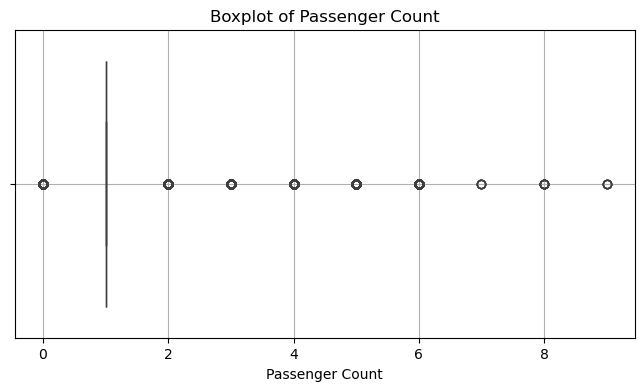

In [97]:
##creating box plot to visualise the distribution for imputation 
plt.figure(figsize=(8, 4))
sns.boxplot(x=taxi['passenger_count'])

plt.title("Boxplot of Passenger Count")
plt.xlabel("Passenger Count")
plt.grid(True)
plt.show()

In [98]:
taxi.passenger_count.describe()

count    1.896320e+06
mean     1.356579e+00
std      8.799119e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [99]:
# Fix missing values in 'RatecodeID'
##based on graphs and distribution below mode based imputation is best
taxi['RatecodeID'].fillna(taxi["RatecodeID"].mode()[0], inplace=True)

C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\607678616.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi['RatecodeID'].fillna(taxi["RatecodeID"].mode()[0], inplace=True)


In [100]:
taxi["RatecodeID"].describe()

count    1.896320e+06
mean     1.612986e+00
std      7.267412e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

<Axes: ylabel='RatecodeID'>

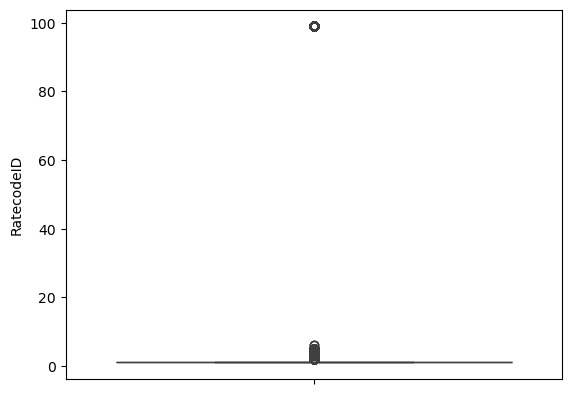

In [101]:
sns.boxplot(taxi["RatecodeID"])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [102]:
# handle null values in congestion_surcharge
print(taxi['congestion_surcharge'].mode()[0])          
taxi['congestion_surcharge'].fillna(taxi["congestion_surcharge"].mode()[0], inplace=True)



2.5


C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\1013958156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi['congestion_surcharge'].fillna(taxi["congestion_surcharge"].mode()[0], inplace=True)


In [103]:
taxi["congestion_surcharge"].describe()


count    1.896320e+06
mean     2.314279e+00
std      6.555994e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64

<Axes: ylabel='congestion_surcharge'>

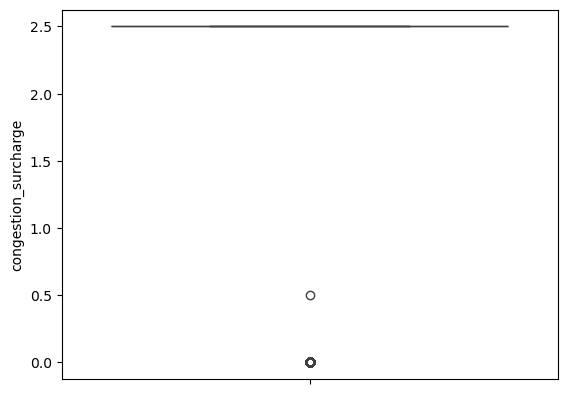

In [104]:
sns.boxplot(taxi["congestion_surcharge"])

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [105]:
# Handle any remaining missing values
taxi.isna().sum().sort_values(ascending=False)

airport_fee              64874
store_and_fwd_flag       64874
VendorID                     0
mta_tax                      0
date                         0
year                         0
congestion_surcharge         0
total_amount                 0
improvement_surcharge        0
tolls_amount                 0
tip_amount                   0
extra                        0
tpep_pickup_datetime         0
fare_amount                  0
payment_type                 0
DOLocationID                 0
PULocationID                 0
RatecodeID                   0
trip_distance                0
passenger_count              0
tpep_dropoff_datetime        0
hour                         0
dtype: int64

In [106]:
##fixing store_and_fwd_flag 
taxi.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    1820207
Y      11239
Name: count, dtype: int64

In [107]:
taxi['store_and_fwd_flag'].fillna('N', inplace=True)


C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\3141942753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi['store_and_fwd_flag'].fillna('N', inplace=True)


count    1.831446e+06
mean     1.429171e-01
std      4.648541e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: airport_fee, dtype: float64


<Axes: ylabel='airport_fee'>

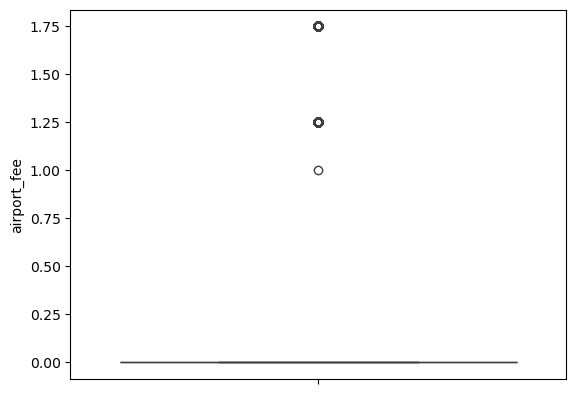

In [108]:
## fixing na values in airport_fee
print(taxi.airport_fee.describe())
sns.boxplot(taxi.airport_fee)

In [109]:
taxi['airport_fee'].fillna(0, inplace=True)



C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\1647696083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi['airport_fee'].fillna(0, inplace=True)


In [110]:
##final check of missing values 
taxi.isna().sum().sort_values(ascending=False)

VendorID                 0
tpep_pickup_datetime     0
date                     0
year                     0
airport_fee              0
congestion_surcharge     0
total_amount             0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
payment_type             0
DOLocationID             0
PULocationID             0
store_and_fwd_flag       0
RatecodeID               0
trip_distance            0
passenger_count          0
tpep_dropoff_datetime    0
hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [111]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
taxi.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896320e+06                     1896320                     1896320   
mean   1.733014e+00  2023-07-02 19:59:09.002167  2023-07-02 20:16:34.993047   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00  2023-04-02 16:09:10.500000         2023-04-02 16:27:21   
50%    2.000000e+00         2023-06-27 15:43:18         2023-06-27 16:00:28   
75%    2.000000e+00  2023-10-06 19:36:21.750000  2023-10-06 19:53:03.250000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476462e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896320e+06   1.896320e+06  1.896320e+06  1.896320e+06   
mean      1.356579e+00   3.858259e+00  1.612986e+00  1.652818e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.799119e-01   1.294112e+02  7.267412e+00  6.400059e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896320e+06  1.896320e+06  1.896320e+06  1.896320e+06  1.896320e+06   
mean   1.640515e+02  1.163780e+00  1.992019e+01  1.588086e+00  4.953195e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980196e+01  5.081097e-01  1.055392e+02  1.829207e+00  4.845242e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896320e+06  1.896320e+06           1.896320e+06  1.896320e+06   
mean   3.547159e+00  5.965590e-01           9.990528e-01  2.898322e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054903e+00  2.187920e+00           2.835795e-02  1.064183e+02   

       congestion_surcharge   airport_fee       year          hour  
count          1.896320e+06  1.896320e+06  1896320.0  1.896320e+06  
mean           2.314279e+00  1.380279e-01     2023.0  1.426505e+01  
min            0.000000e+00  0.000000e+00     2023.0  0.000000e+00  
25%            2.500000e+00  0.000000e+00     2023.0  1.100000e+01  
50%            2.500000e+00  0.000000e+00     2023.0  1.500000e+01  
75%            2.500000e+00  0.000000e+00     2023.0  1.900000e+01  
max            2.500000e+00  1.750000e+00     2023.0  2.300000e+01  
std            6.555994e-01  4.575715e-01        0.0  5.807415e+00

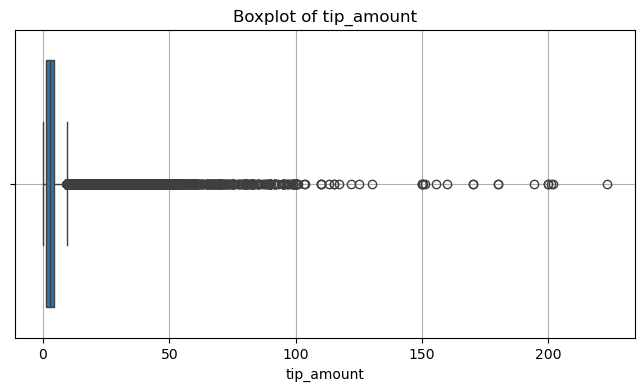

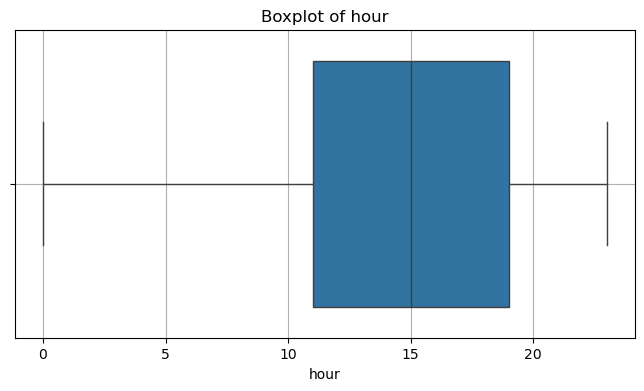

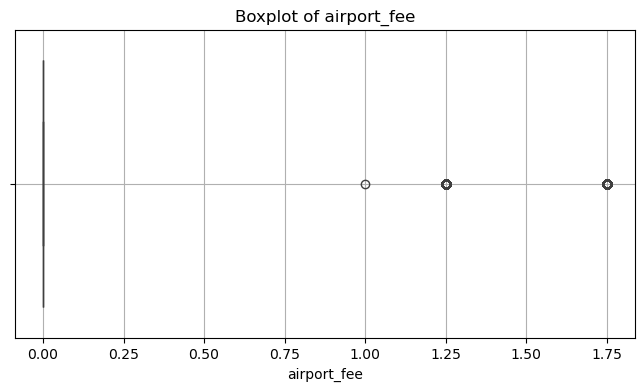

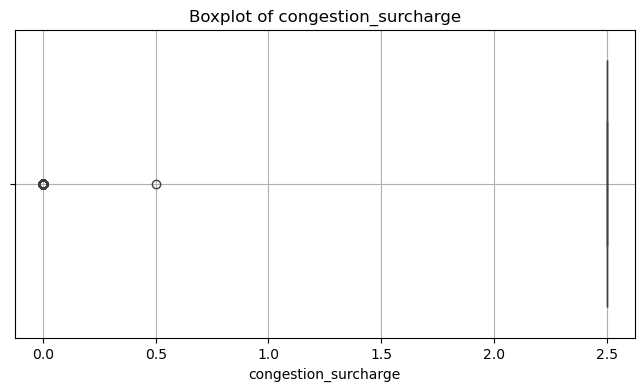

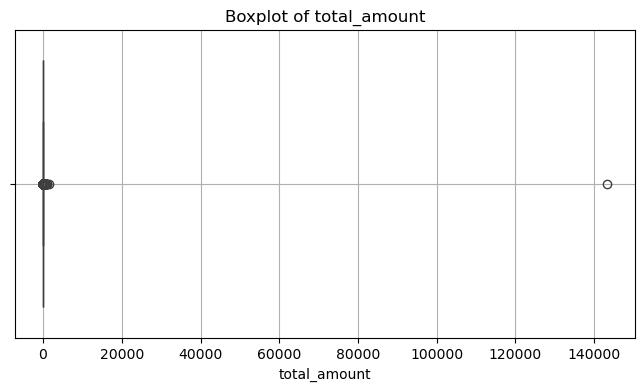

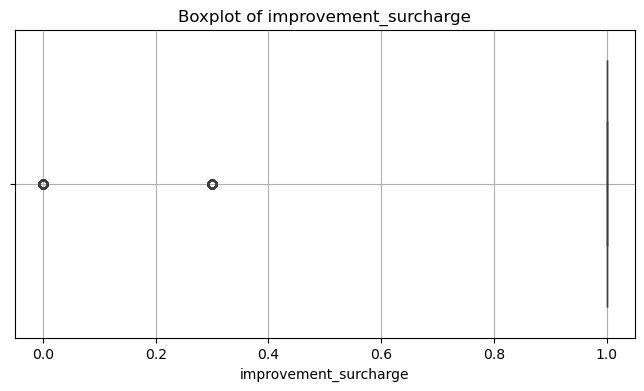

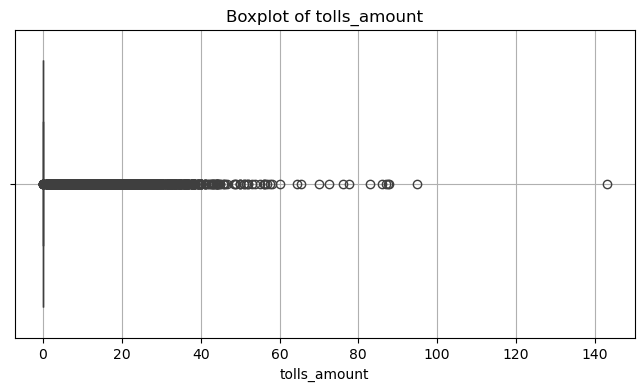

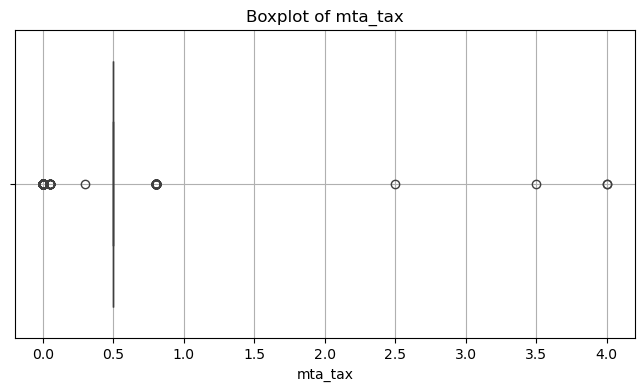

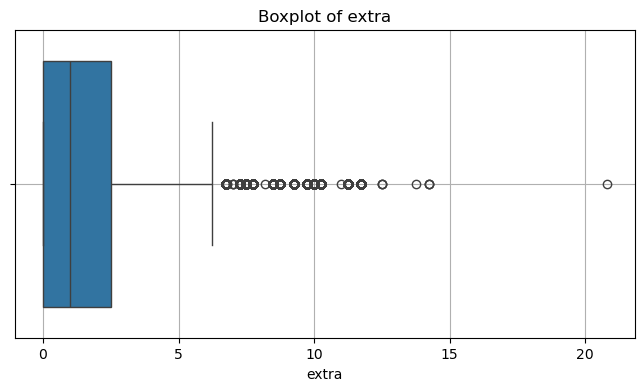

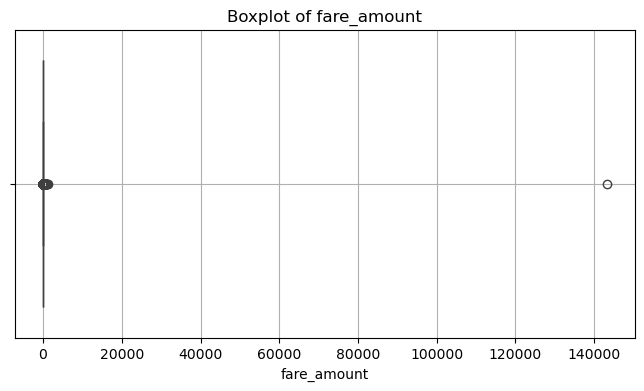

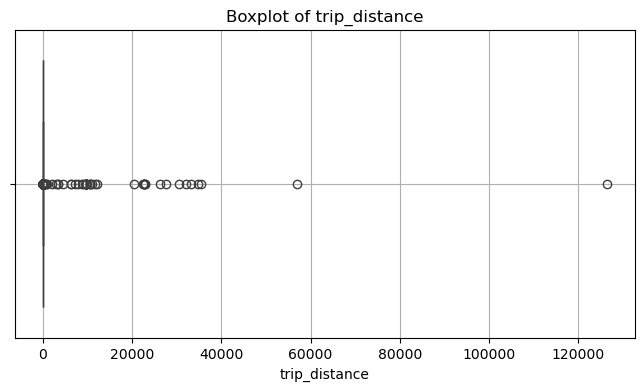

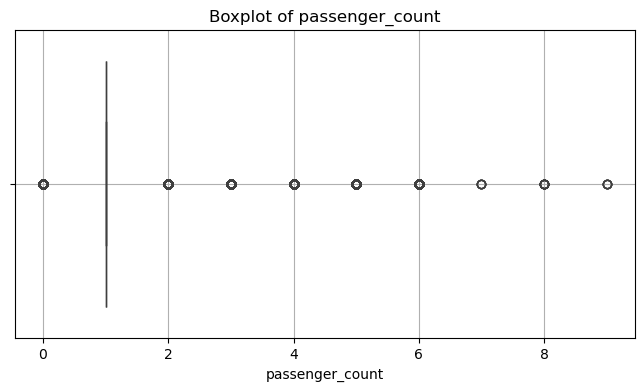

In [112]:
num_cols = [
    'tip_amount',
    'hour',
    'airport_fee',
    'congestion_surcharge',
    'total_amount',
    'improvement_surcharge',
    'tolls_amount',
    'mta_tax',
    'extra',
    'fare_amount',
    'trip_distance',
    'passenger_count',
]


for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=taxi[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [113]:
# remove passenger_count > 6
taxi=taxi[taxi.passenger_count<=5]

In [114]:
# Continue with outlier handling
## removing rows where trip distance is 0 and fair >300
taxi = taxi[~((taxi.trip_distance == 0) & (taxi.fare_amount > 300))]
##Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
taxi = taxi[~((taxi.trip_distance == 0) & (taxi.fare_amount==0) & (taxi["PULocationID"]!=taxi["DOLocationID"]))]
#Entries where trip_distance is more than 250 miles
taxi = taxi[taxi.trip_distance <= 250]
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
taxi = taxi[taxi.payment_type != 0]


In [115]:
taxi = taxi[taxi.fare_amount <= 500]
taxi = taxi[taxi.total_amount <= 600]
taxi = taxi[taxi.tip_amount <= 200]


In [116]:
taxi.reset_index(drop=True,inplace=True)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815439 entries, 0 to 1815438
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [117]:
# Do any columns need standardising?
#payment types 
valid_payment_types = [1, 2, 3, 4, 5, 6]
taxi = taxi[taxi['payment_type'].isin(valid_payment_types)]



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [118]:
taxi.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'year',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical 
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numberical
* `RatecodeID`: Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`: Numerical /categorical depending on context 
* `trip_duration`:Nurmerical


The following monetary parameters belong in the same category, is it categorical or numerical?


<b>All of the below are Numerical</b>

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\1534150288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=taxi, palette='coolwarm')


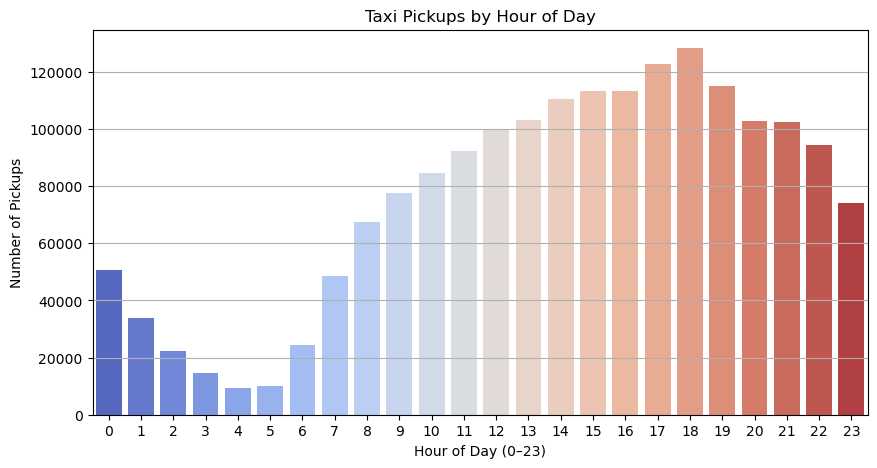

In [119]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=taxi, palette='coolwarm')
plt.title('Taxi Pickups by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.grid(axis='y')
plt.show()


C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\2260072696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=taxi, order=order, palette='Set2')


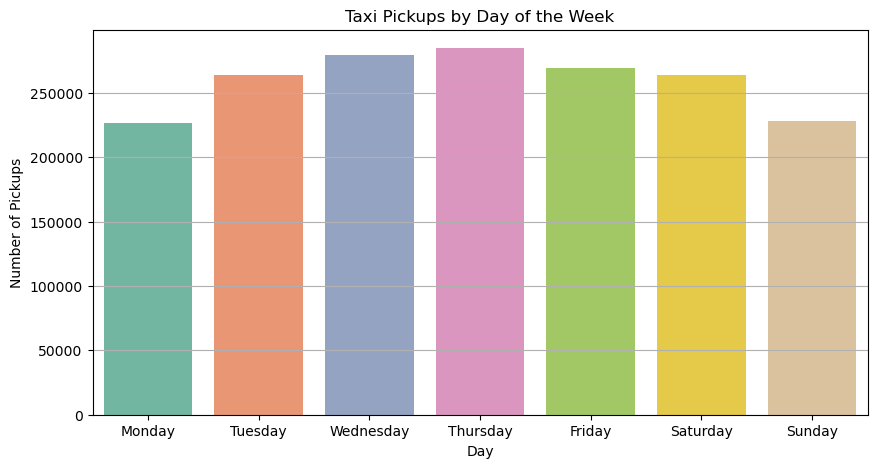

In [120]:
# Find and show the daily trends in taxi pickups (days of the week)

taxi['day_of_week'] = taxi['tpep_pickup_datetime'].dt.day_name()
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day_of_week', data=taxi, order=order, palette='Set2')
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Pickups')
plt.grid(axis='y')
plt.show()



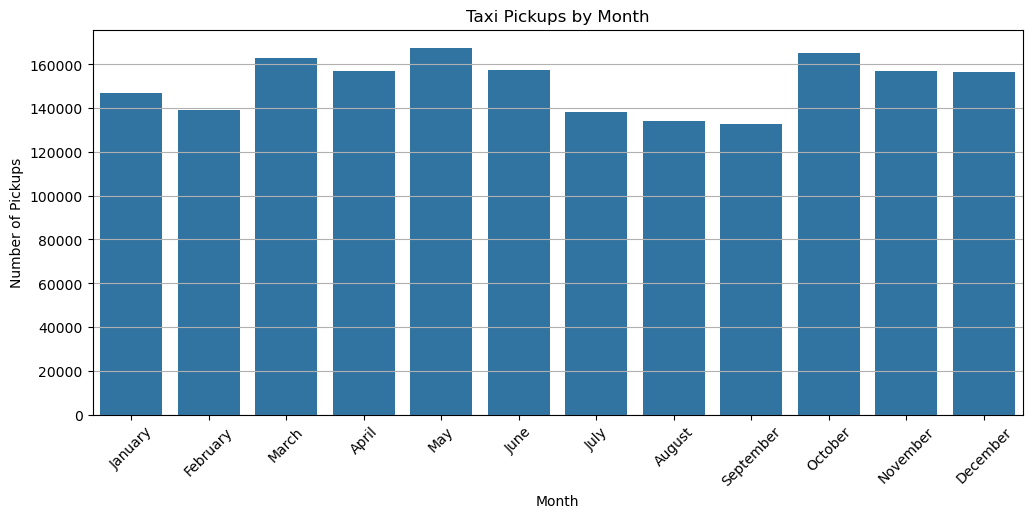

In [121]:
# Show the monthly trends in pickups

taxi['month'] = taxi['tpep_pickup_datetime'].dt.month_name()
plt.figure(figsize=(12, 5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x='month', data=taxi, order=month_order)
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [122]:
# Analyse the above parameters
# Check zero/negative values
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in cols_to_check:
    print((taxi[col] < 0).sum(), "rows with negative values")



0 rows with negative values
0 rows with negative values
0 rows with negative values
0 rows with negative values


In [123]:
#checkinh for Zeros
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in cols_to_check:
    print((taxi[col] == 0).sum(), "rows with 0s")

499 rows with 0s
406742 rows with 0s
253 rows with 0s
22840 rows with 0s


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [124]:
# Create a df with non zero entries for the selected parameters.

taxi_nonzero = taxi[
    (taxi['fare_amount'] > 0) &
    (taxi['tip_amount'] >= 0) &
    (taxi['total_amount'] > 0) &
    (taxi['trip_distance'] > 0)  # Can choose to keep =0 cases if needed but in my understanding only two condition pickup and drop are same oneis round trip and other is cancellation,since in round truips there will be fare_amount is is okay to remove 
].copy()


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

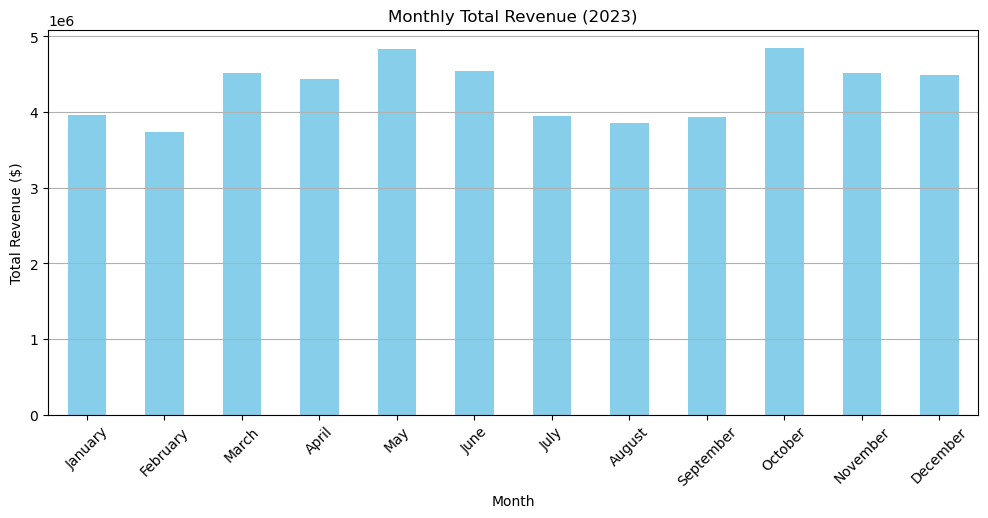

In [125]:
# Group data by month and analyse monthly revenue
taxi_nonzero["month"]=taxi_nonzero['tpep_pickup_datetime'].dt.month_name()
monthly_revenue = taxi_nonzero.groupby(by=["month"])['total_amount'].sum()
monthly_revenue = monthly_revenue.loc[[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]]  #for  proper order

# Plot
plt.figure(figsize=(12, 5))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title("Monthly Total Revenue (2023)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

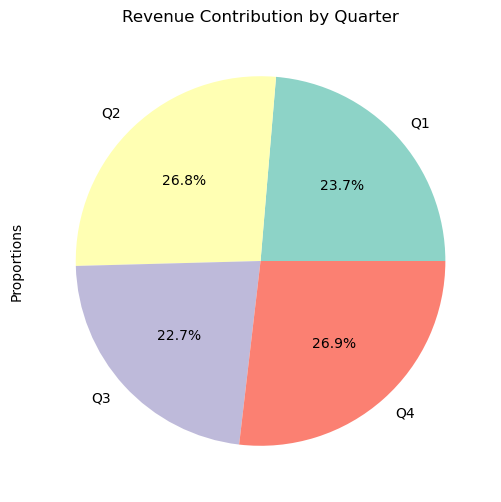

In [126]:
# Calculate proportion of each quarter
taxi_nonzero['quarter'] = taxi_nonzero['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = taxi_nonzero.groupby('quarter')['total_amount'].sum()
quarterly_prop = quarterly_revenue / quarterly_revenue.sum()

# Plot
plt.figure(figsize=(6, 6))
quarterly_prop.plot(kind='pie', autopct='%1.1f%%', labels=['Q1','Q2','Q3','Q4'], colors=sns.color_palette('Set3'))
plt.title("Revenue Contribution by Quarter")
plt.ylabel("Proportions")  # Hide y-axis label
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

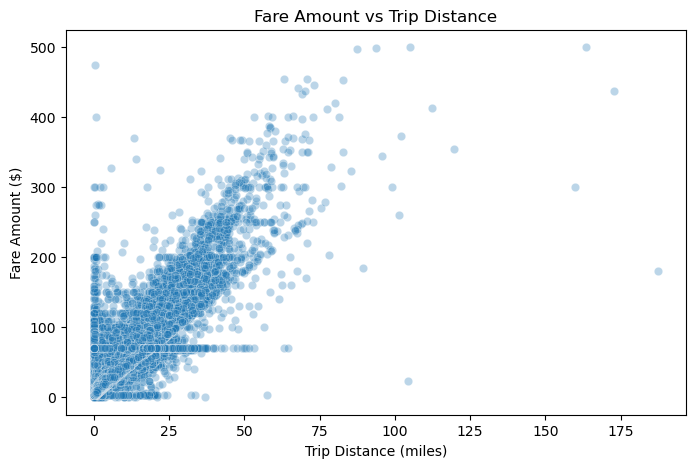

0.944874998500509


In [127]:
# Show how trip fare is affected by distance

fare_dist_df = taxi_nonzero[taxi_nonzero['trip_distance'] > 0]

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=fare_dist_df, alpha=0.3)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Correlation
corr_val = fare_dist_df['trip_distance'].corr(fare_dist_df['fare_amount'])

print(corr_val)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

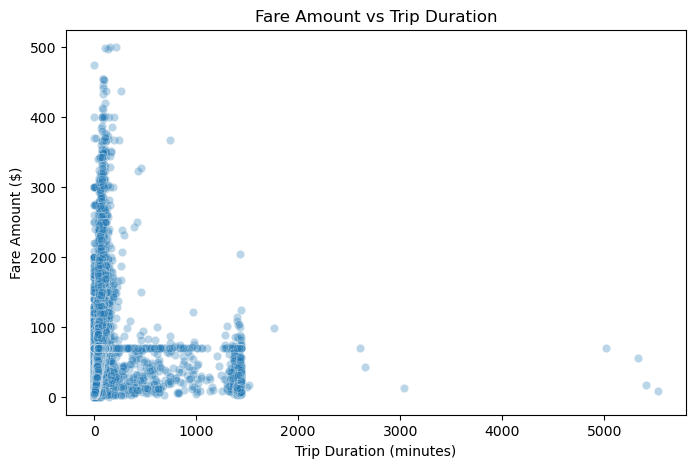

0.2798175993307751


In [128]:
# Show relationship between fare and trip duration
taxi_nonzero['trip_duration'] = (taxi_nonzero['tpep_dropoff_datetime'] - taxi_nonzero['tpep_pickup_datetime']).dt.total_seconds() / 60

 #Removing any negative or 0 durations (possible data errors)
duration_df = taxi_nonzero[taxi_nonzero['trip_duration'] > 0]

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_duration', y='fare_amount', data=duration_df, alpha=0.3)
plt.title("Fare Amount vs Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.show()

#Correlation
corr_duration = duration_df['trip_duration'].corr(duration_df['fare_amount'])
print(corr_duration)


C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\2879333215.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='passenger_count', y='fare_amount', data=taxi_nonzero, palette='Pastel1')


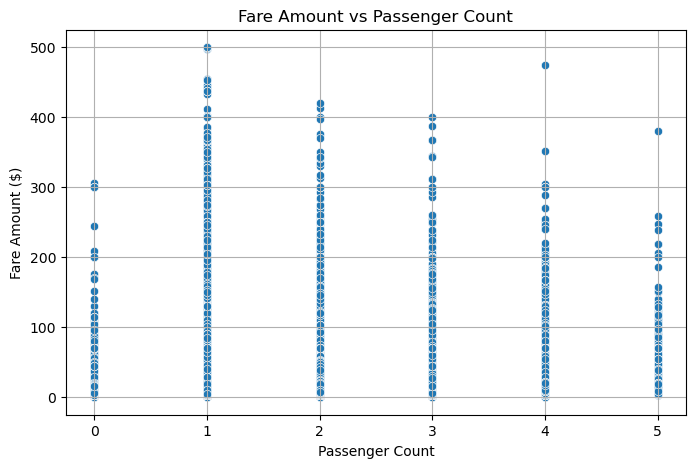

0.05246229918435033


In [129]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 5))
sns.scatterplot(x='passenger_count', y='fare_amount', data=taxi_nonzero, palette='Pastel1')
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

# Correlation
corr_passenger = taxi_nonzero['passenger_count'].corr(taxi_nonzero['fare_amount'])
print(corr_passenger)

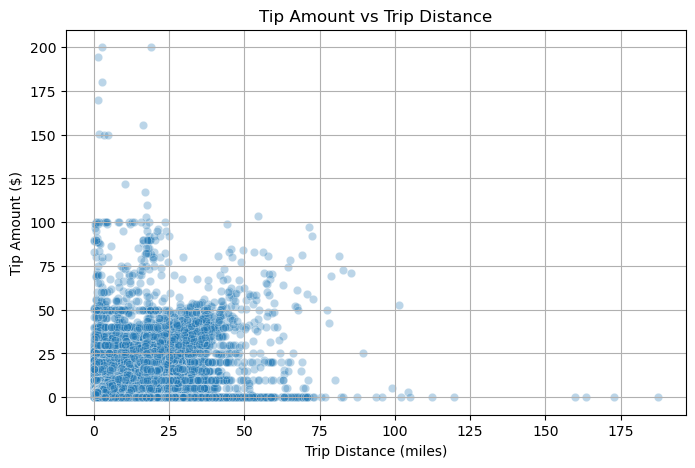

0.588744107013411


In [130]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='tip_amount', data=taxi_nonzero, alpha=0.3)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.show()

# Correlation
corr_tip = taxi_nonzero['trip_distance'].corr(taxi_nonzero['tip_amount'])
print(corr_tip)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

C:\Users\aniru\AppData\Local\Temp\ipykernel_30176\1227303794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=taxi_nonzero, palette='pastel')


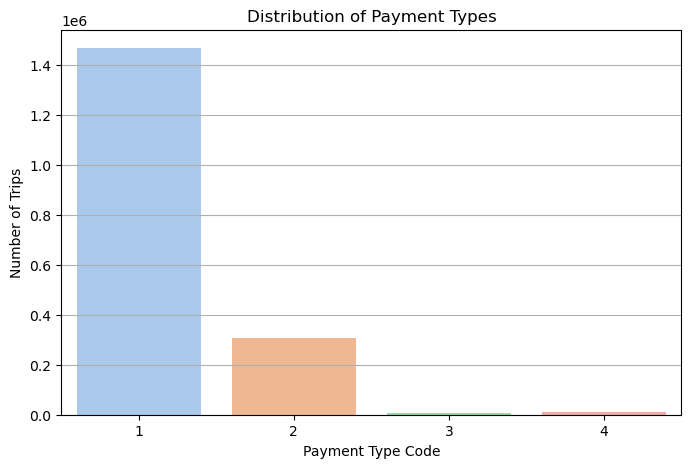

In [131]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=taxi_nonzero, palette='pastel')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type Code")
plt.ylabel("Number of Trips")
plt.grid(axis='y')



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [132]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\aniru\Desktop\Upgrad IIIT AI\Course 1_ SQL and Stats\M7 EDA Assignmnet NYC Taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

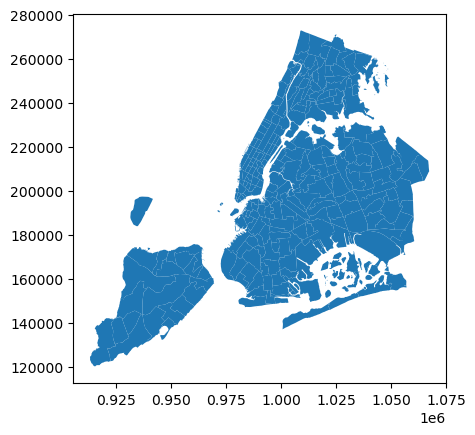

In [133]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [134]:
# Merge zones and trip records using locationID and PULocationID
taxi_pickup_geo = taxi_nonzero.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')




**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [135]:
# Group data by location and calculate the number of trips

no_trips = taxi_pickup_geo.groupby('LocationID').size().reset_index(name='trip_count')
print(no_trips)

     LocationID  trip_count
0           1.0          47
1           2.0           2
2           3.0          31
3           4.0        1797
4           5.0           9
..          ...         ...
247       259.0          35
248       260.0         300
249       261.0        9402
250       262.0       23262
251       263.0       34373

[252 rows x 2 columns]


<Axes: >

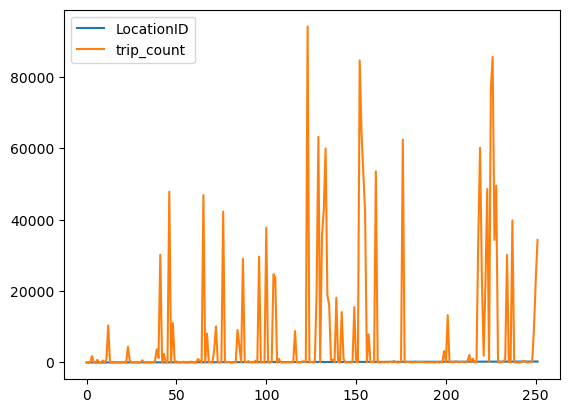

In [136]:


no_trips.plot()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [137]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(no_trips, on='LocationID', how='left')






The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

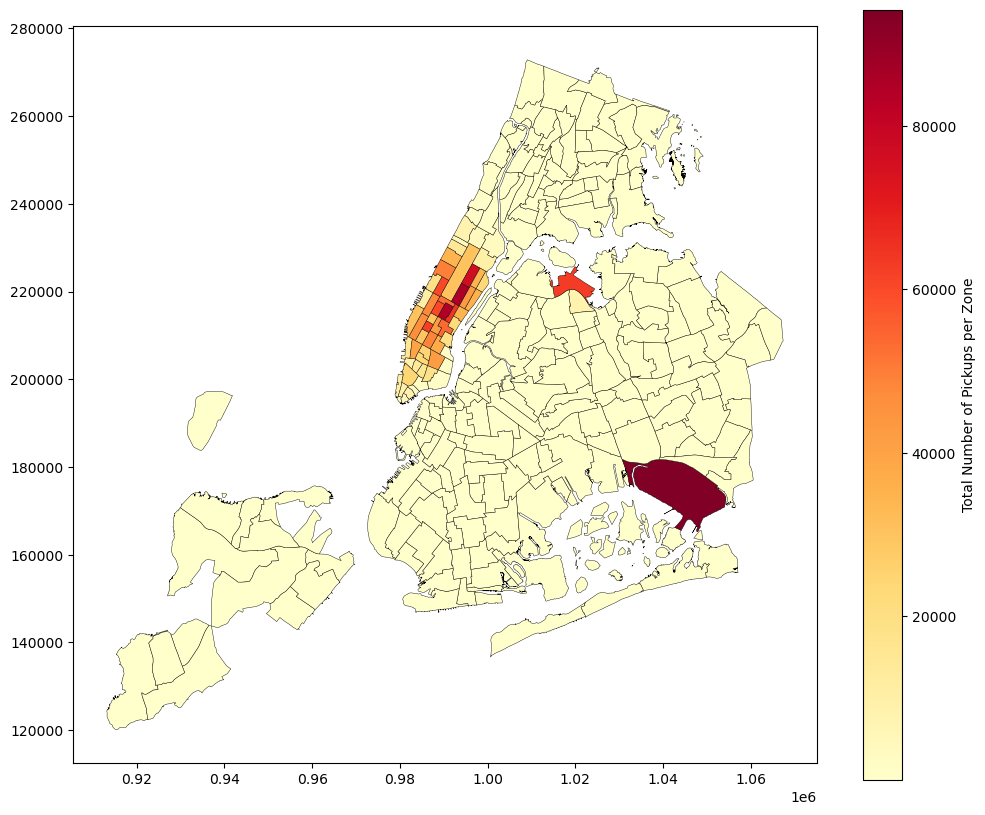

In [138]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column='trip_count',           # This is the column showing number of trips
    ax=ax,                    # Set axis
    legend=True,              # Show legend
    cmap='YlOrRd',            # Choose a good color map
    edgecolor='black',        # Add black border to each zone
    linewidth=0.3,            # Thin border line
    legend_kwds={
        'label': "Total Number of Pickups per Zone",
        'orientation': "vertical"
    }
)



In [139]:
# can you try displaying the zones DF sorted by the number of trips?
print(zones.sort_values("trip_count",ascending= False))


     OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   
..        ...         ...         ...                    ...         ...   
108       109    0.178268    0.001170            Great Kills         109   
109       110    0.103946    0.000526       Great Kills Park         110   
175       176    0.151995    0.000658                Oakwood         176   
220       221    0.166218    0.000890              Stapleton         221   
244       245    0.095983    0.000466          West Brighton         245   

           borough                                           geometry  \
131         Qu

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [140]:
 taxi_nonzero[(taxi_nonzero['trip_duration'] < 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
336057          2  2023-11-05 01:25:30   2023-11-05 01:08:04              3.0   
336062          2  2023-11-05 01:53:23   2023-11-05 01:02:12              2.0   
336072          2  2023-11-05 01:24:15   2023-11-05 01:03:15              1.0   
336074          2  2023-11-05 01:53:24   2023-11-05 01:00:39              1.0   
336083          2  2023-11-05 01:44:38   2023-11-05 01:05:43              1.0   
336092          1  2023-11-05 01:59:01   2023-11-05 01:14:45              1.0   
336094          2  2023-11-05 01:58:09   2023-11-05 01:23:58              1.0   
336097          1  2023-11-05 01:50:53   2023-11-05 01:02:37              1.0   
336106          1  2023-11-05 01:59:30   2023-11-05 01:15:33              1.0   
336122          2  2023-11-05 01:59:19   2023-11-05 01:12:55              2.0   
336144          1  2023-11-05 01:53:06   2023-11-05 01:00:52              1.0   
336153          1  2023-11-05 01:58:32   2023-11-05 01:13:26              2.0   
336178          2  2023-11-05 01:51:17   2023-11-05 01:18:13              2.0   
336195          1  2023-11-05 01:52:31   2023-11-05 01:03:17              2.0   
336214          2  2023-11-05 01:45:35   2023-11-05 01:01:45              1.0   
336216          1  2023-11-05 01:41:16   2023-11-05 01:01:11              1.0   
336225          2  2023-11-05 01:22:28   2023-11-05 01:10:25              1.0   
336228          2  2023-11-05 01:58:19   2023-11-05 01:20:19              1.0   
336235          2  2023-11-05 01:58:38   2023-11-05 01:08:06              1.0   
336248          2  2023-11-05 01:57:58   2023-11-05 01:05:33              2.0   
336255          1  2023-11-05 01:36:34   2023-11-05 01:09:50              1.0   
336266          1  2023-11-05 01:52:03   2023-11-05 01:00:42              1.0   
336268          2  2023-11-05 01:24:41   2023-11-05 01:00:00              1.0   
336270          2  2023-11-05 01:58:50   2023-11-05 01:13:41              1.0   
336272          2  2023-11-05 01:54:41   2023-11-05 01:00:23              1.0   
336281          2  2023-11-05 01:42:53   2023-11-05 01:05:36              1.0   
336293          2  2023-11-05 01:41:28   2023-11-05 01:08:04              1.0   
336294          2  2023-11-05 01:53:05   2023-11-05 01:07:15              1.0   
336295          2  2023-11-05 01:47:51   2023-11-05 01:00:49              3.0   
336327          2  2023-11-05 01:42:12   2023-11-05 01:04:24              1.0   
336346          2  2023-11-05 01:40:43   2023-11-05 01:06:12              1.0   
336363          2  2023-11-05 01:47:47   2023-11-05 01:05:05              1.0   
336378          2  2023-11-05 01:51:47   2023-11-05 01:09:07              1.0   
336389          2  2023-11-05 01:58:17   2023-11-05 01:14:41              1.0   
336407          1  2023-11-05 01:51:19   2023-11-05 01:04:06              1.0   
336412          2  2023-11-05 01:54:57   2023-11-05 01:03:08              1.0   
336419          2  2023-11-05 01:59:08   2023-11-05 01:05:55              1.0   
336422          1  2023-11-05 01:57:57   2023-11-05 01:05:21              3.0   
336430          2  2023-11-05 01:58:09   2023-11-05 01:08:11              1.0   
1064698         1  2023-08-28 12:28:00   2023-08-28 12:17:18              1.0   
1077231         1  2023-08-31 11:40:00   2023-08-31 11:24:26              1.0   
1089089         1  2023-02-02 13:02:23   2023-02-02 12:50:35              1.0   
1670215         1  2023-07-29 11:45:00   2023-07-29 11:29:01              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
336057            9.01         1.0                  N           114   
336062            1.84         1.0                  N           148   
336072            7.76         1.0                  N            68   
336074            2.36         1.0                  N           162   
336083            4.70         1.0                  N           249   
336092            

In [141]:
# Find routes which have the slowest speeds at different times of the day

taxi_nonzero['hour'] = taxi_nonzero['tpep_pickup_datetime'].dt.hour
# Removing rows with negative or zero trip distances or trip durations
taxi_nonzero = taxi_nonzero[(taxi_nonzero['trip_duration'] > 0)]


taxi_nonzero["speed_miles/hr"]=(taxi_nonzero["trip_distance"]/taxi_nonzero["trip_duration"])*60

#Removing rows with speed >100 
taxi_nonzero = taxi_nonzero[taxi_nonzero['speed_miles/hr'] <101]

# Group by pickup and dropoff zones
route_speeds = (
    taxi_nonzero.groupby(['PULocationID', 'DOLocationID','hour'])['speed_miles/hr']
    .mean()
    .reset_index()
)

route_speeds_sorted = route_speeds.sort_values(by=['PULocationID', 'DOLocationID', 'speed_miles/hr'], ascending=[True, True, True])

# Display the sorted result
route_speeds_sorted.head(10)



PULocationID  DOLocationID  hour  speed_miles/hr
9              1             1    15        2.961290
1              1             1     5        3.600000
5              1             1    11       13.010989
2              1             1     6       13.246097
7              1             1    13       14.493506
8              1             1    14       14.604173
6              1             1    12       16.736842
12             1             1    18       16.900000
10             1             1    16       19.208791
0              1             1     3       25.899281

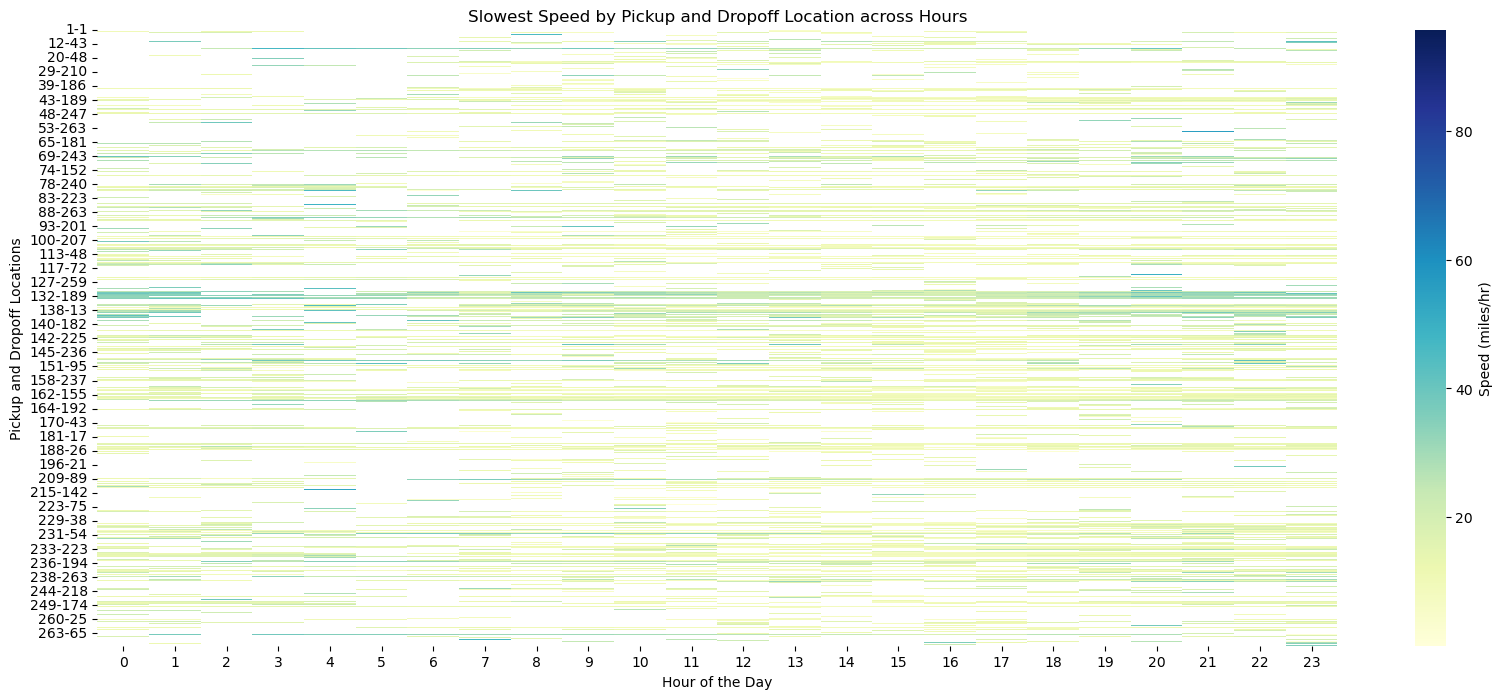

In [142]:
#creating a heat Map to visualise 
# Group by PULocationID, DOLocationID, and hour to calculate mean speed
hourly_speeds = taxi_nonzero.groupby(['PULocationID', 'DOLocationID', 'hour'])['speed_miles/hr'].mean().reset_index()

# Pivot the data to create a grid with PULocationID and DOLocationID on x and y axes, and hours as columns
speed_grid = hourly_speeds.pivot_table(index=['PULocationID', 'DOLocationID'], columns='hour', values='speed_miles/hr', aggfunc='mean')



# Display the result
speed_grid.head(10)

# Plot a heatmap to visualize the slowest speeds across locations and hours
plt.figure(figsize=(20, 8))
sns.heatmap(speed_grid, cmap="YlGnBu", annot=False, fmt=".2f", cbar_kws={'label': 'Speed (miles/hr)'})
plt.title("Slowest Speed by Pickup and Dropoff Location across Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup and Dropoff Locations")
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

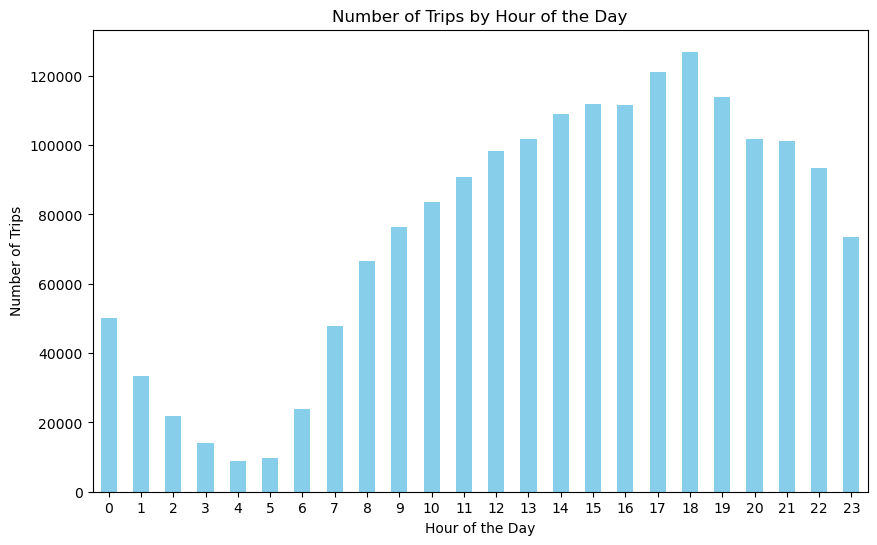

The busiest hour is 18 with 126953 trips.


In [143]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = taxi_nonzero.groupby('hour')["hour"].count()
# Visualize the number of trips by hour
plt.figure(figsize=(10, 6))
hourly_trips.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


busiest_hour = hourly_trips.idxmax()
busiest_hour_trips = hourly_trips.max()

print(f"The busiest hour is {busiest_hour} with {busiest_hour_trips} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [144]:
# Scale up the number of trips
busiest_5=hourly_trips.sort_values(ascending=False).head(5)
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05

#Scaling by a factor of 20
actual_trips=busiest_5/sample_fraction

print(actual_trips)

#Total trips in busiest 5 hours 

print("The sum of Trips of Top 5 Busiest Hours is {0}".format(actual_trips.sum()))






hour
18    2539060.0
17    2421340.0
19    2278900.0
15    2235120.0
16    2233320.0
Name: hour, dtype: float64
The sum of Trips of Top 5 Busiest Hours is 11707740.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

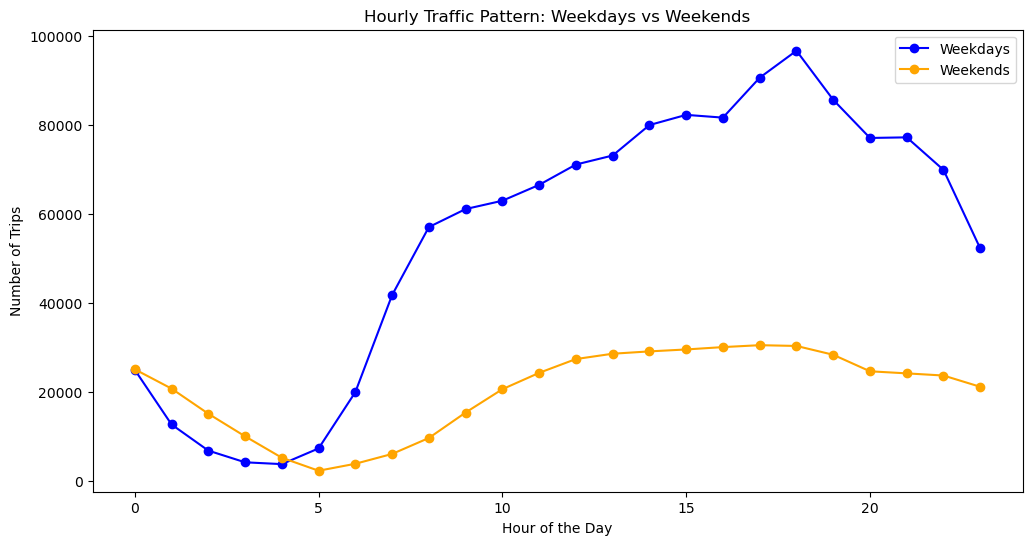

In [145]:
# Compare traffic trends for the week days and weekends

# Classify weekends (Saturday, Sunday)
taxi_nonzero['is_weekend'] = taxi_nonzero['day_of_week'].isin(['Saturday', 'Sunday'])

# Group by hour and is_weekend
hourly_weekend_trips = taxi_nonzero[taxi_nonzero['is_weekend']].groupby('hour')['hour'].count()
hourly_weekday_trips = taxi_nonzero[~taxi_nonzero['is_weekend']].groupby('hour')['hour'].count()

# Plot hourly traffic patterns for weekdays and weekends
plt.figure(figsize=(12, 6))

# Weekday plot
plt.plot(hourly_weekday_trips.index, hourly_weekday_trips.values, label='Weekdays', color='blue', marker='o')

# Weekend plot
plt.plot(hourly_weekend_trips.index, hourly_weekend_trips.values, label='Weekends', color='orange', marker='o')

# Adding labels and title
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend()

# Display the plot
plt.show()





In [146]:
taxi_nonzero.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'year', 'date',
       'hour', 'day_of_week', 'month', 'quarter', 'trip_duration',
       'speed_miles/hr', 'is_weekend'],
      dtype='object')

In [147]:
taxi_nonzero.day_of_week

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
             ...   
1815434    Saturday
1815435    Saturday
1815436    Saturday
1815437    Saturday
1815438    Saturday
Name: day_of_week, Length: 1791498, dtype: object

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

PULocationID
132    94100
237    85687
161    84665
236    76418
162    64648
138    63244
186    62474
230    60178
142    60001
170    53560
Name: pickup_count, dtype: int64
DOLocationID
236    80168
237    76435
161    70498
230    55372
170    53359
162    51335
142    50727
239    50554
141    47741
68     45506
Name: dropoff_count, dtype: int64


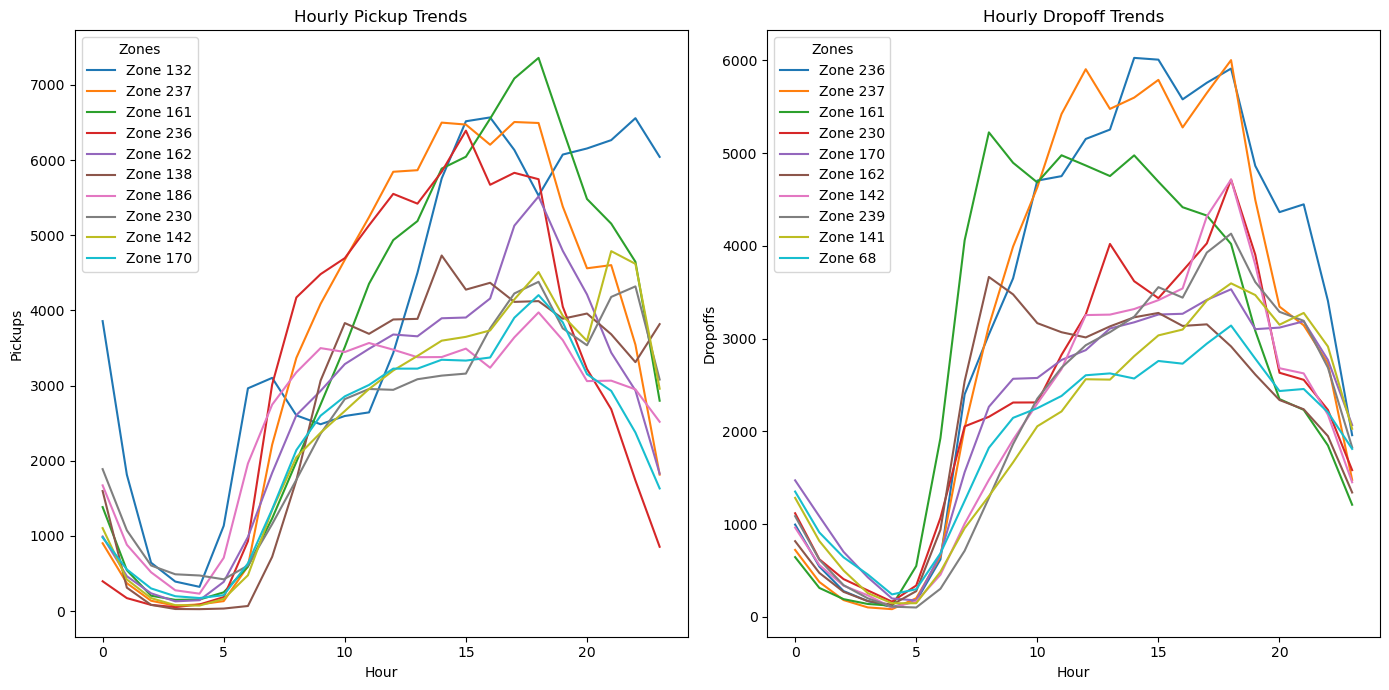

In [148]:
# Find top 10 pickup and dropoff zones

#  Group by PULocationID for pickups and DOLocationID for dropoffs
pickup_hourly = taxi_nonzero.groupby(['PULocationID', 'hour']).size().reset_index(name='pickup_count')
dropoff_hourly = taxi_nonzero.groupby(['DOLocationID', 'hour']).size().reset_index(name='dropoff_count')

#  Get the top 10 zones for pickups and dropoffs
top_10_pickup_zones = pickup_hourly.groupby('PULocationID')['pickup_count'].sum().nlargest(10)
print(top_10_pickup_zones)

top_10_dropoff_zones = dropoff_hourly.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10)

print(top_10_dropoff_zones)
# Filter the data for the top 10 zones
top_pickup_data = pickup_hourly[pickup_hourly['PULocationID'].isin(top_10_pickup_zones.index)]
top_dropoff_data = dropoff_hourly[dropoff_hourly['DOLocationID'].isin(top_10_dropoff_zones.index)]

# Step 3: Plot the results
plt.figure(figsize=(14, 7))

# Plot pickup trends
plt.subplot(1, 2, 1)
for zone in top_10_pickup_zones.index:
    zone_data = top_pickup_data[top_pickup_data['PULocationID'] == zone]
    plt.plot(zone_data['hour'], zone_data['pickup_count'], label=f'Zone {zone}')
plt.title('Hourly Pickup Trends')
plt.xlabel('Hour')
plt.ylabel('Pickups')
plt.legend(title='Zones', loc='upper left')

# Plot dropoff trends
plt.subplot(1, 2, 2)
for zone in top_10_dropoff_zones.index:
    zone_data = top_dropoff_data[top_dropoff_data['DOLocationID'] == zone]
    plt.plot(zone_data['hour'], zone_data['dropoff_count'], label=f'Zone {zone}')
plt.title('Hourly Dropoff Trends')
plt.xlabel('Hour')
plt.ylabel('Dropoffs')
plt.legend(title='Zones', loc='upper left')

plt.tight_layout()
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [149]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Group data by PULocationID for pickups and count the occurrences
pickup_count = taxi_nonzero.groupby('PULocationID')['PULocationID'].count().reset_index(name='pickup_count')

# Group data by DOLocationID for dropoffs and count the occurrences
dropoff_count = taxi_nonzero.groupby('DOLocationID')['DOLocationID'].count().reset_index(name='dropoff_count')

# Merge pickup and dropoff data on the LocationID (PULocationID and DOLocationID)
pickup_dropoff = pd.merge(pickup_count, dropoff_count, left_on='PULocationID', right_on='DOLocationID', how='outer')

# Calculate the pickup/dropoff ratio
pickup_dropoff['ratio'] = pickup_dropoff['pickup_count'] / pickup_dropoff['dropoff_count']

# Sort by ratio to find the zones with the highest and lowest ratios
highest_ratio = pickup_dropoff.sort_values(by='ratio', ascending=False).head(10)
print("Top 10 Zones with Highest Pickup/Dropoff Ratio:")
print(highest_ratio)

lowest_ratio = pickup_dropoff.sort_values(by='ratio').head(10)
print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratio:")
print(lowest_ratio)



Top 10 Zones with Highest Pickup/Dropoff Ratio:
     PULocationID  pickup_count  DOLocationID  dropoff_count     ratio
69           70.0        8078.0          70.0          847.0  9.537190
127         132.0       94100.0         132.0        19081.0  4.931607
133         138.0       63244.0         138.0        21546.0  2.935301
181         186.0       62474.0         186.0        39408.0  1.585313
42           43.0       30204.0          43.0        21953.0  1.375848
109         114.0       23747.0         114.0        17273.0  1.374805
244         249.0       39843.0         249.0        30015.0  1.327436
157         162.0       64648.0         162.0        51335.0  1.259336
156         161.0       84665.0         161.0        70498.0  1.200956
99          100.0       29665.0         100.0        24877.0  1.192467

Top 10 Zones with Lowest Pickup/Dropoff Ratio:
     PULocationID  pickup_count  DOLocationID  dropoff_count     ratio
0             1.0          38.0           1.0       

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [150]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter the data for night hours (11 PM to 5 AM)
night_hours = taxi_nonzero[(taxi_nonzero['hour'] >= 23) | (taxi_nonzero['hour'] <= 5)]

# Group by PULocationID for pickups and calculate the count of trips
pickup_count_night = night_hours.groupby('PULocationID')['PULocationID'].count().reset_index(name='pickup_count')

# Group by DOLocationID for dropoffs and calculate the count of trips
dropoff_count_night = night_hours.groupby('DOLocationID')['DOLocationID'].count().reset_index(name='dropoff_count')

# Sort by pickup count to find the top 10 pickup zones during night hours
top_10_pickup_zones = pickup_count_night.sort_values(by='pickup_count', ascending=False).head(10)
print("Top 10 Pickup Zones During Night Hours:")
print(top_10_pickup_zones)

# Sort by dropoff count to find the top 10 dropoff zones during night hours
top_10_dropoff_zones = dropoff_count_night.sort_values(by='dropoff_count', ascending=False).head(10)
print("\nTop 10 Dropoff Zones During Night Hours:")
print(top_10_dropoff_zones)


Top 10 Pickup Zones During Night Hours:
     PULocationID  pickup_count
70             79         15306
112           132         14211
217           249         12283
42             48         10236
128           148          9469
97            114          8614
199           230          8039
160           186          6810
142           164          6024
118           138          5899

Top 10 Dropoff Zones During Night Hours:
     DOLocationID  dropoff_count
77             79           8142
46             48           6715
164           170           6127
66             68           5711
102           107           5646
135           141           5179
255           263           4896
241           249           4836
222           230           4514
221           229           4301


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [151]:
# Filter for night hours (11 PM to 5 AM)
# Filter the data for nighttime (11 PM to 5 AM) and daytime (6 AM to 10 PM)
night_hours_data = taxi_nonzero[(taxi_nonzero['hour'] >= 23) | (taxi_nonzero['hour'] <= 5)]
day_hours_data = taxi_nonzero[(taxi_nonzero['hour'] >= 6) & (taxi_nonzero['hour'] <= 22)]

# Calculate total revenue for nighttime and daytime
night_revenue = night_hours_data['total_amount'].sum()
day_revenue = day_hours_data['total_amount'].sum()

# Calculate total revenue for the entire dataset
total_revenue = taxi_nonzero['total_amount'].sum()

# Calculate the revenue share for nighttime and daytime
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Print the results
print("Nighttime Revenue Share: {0}".format(night_revenue_share))
print("Daytime Revenue Share: {0}".format(day_revenue_share))


Nighttime Revenue Share: 12.002556562064486
Daytime Revenue Share: 87.99744343793549


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

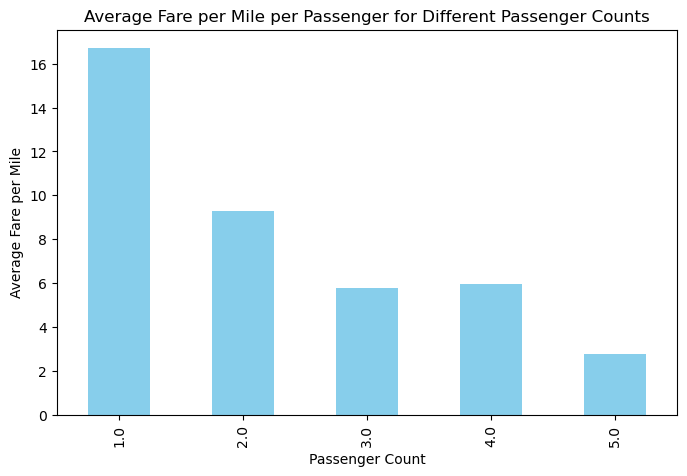

passenger_count
1.0    16.716744
2.0     9.275507
3.0     5.794272
4.0     5.932252
5.0     2.741442
Name: fare_per_mile_per_passenger, dtype: float64


In [152]:
# Analyse the fare per mile per passenger for different passenger counts

# Remove rows where passenger count is less than 0
taxi_nonzero = taxi_nonzero[taxi_nonzero['passenger_count'] > 0.0]

# Calculate fare per mile per passenger
taxi_nonzero['fare_per_mile'] = taxi_nonzero['total_amount'] / taxi_nonzero['trip_distance']
taxi_nonzero['fare_per_mile_per_passenger'] = taxi_nonzero['fare_per_mile'] / taxi_nonzero['passenger_count']

# Calculate average fare per mile per passenger for each passenger count
fare_per_passenger = taxi_nonzero.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Plot the results
fare_per_passenger.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Average Fare per Mile per Passenger for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile')
plt.show()

print(fare_per_passenger)





In [153]:
taxi_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762808 entries, 0 to 1815438
Data columns (total 30 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   VendorID                     int64         
 1   tpep_pickup_datetime         datetime64[us]
 2   tpep_dropoff_datetime        datetime64[us]
 3   passenger_count              float64       
 4   trip_distance                float64       
 5   RatecodeID                   float64       
 6   store_and_fwd_flag           object        
 7   PULocationID                 int64         
 8   DOLocationID                 int64         
 9   payment_type                 int64         
 10  fare_amount                  float64       
 11  extra                        float64       
 12  mta_tax                      float64       
 13  tip_amount                   float64       
 14  tolls_amount                 float64       
 15  improvement_surcharge        float64       
 16  total

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

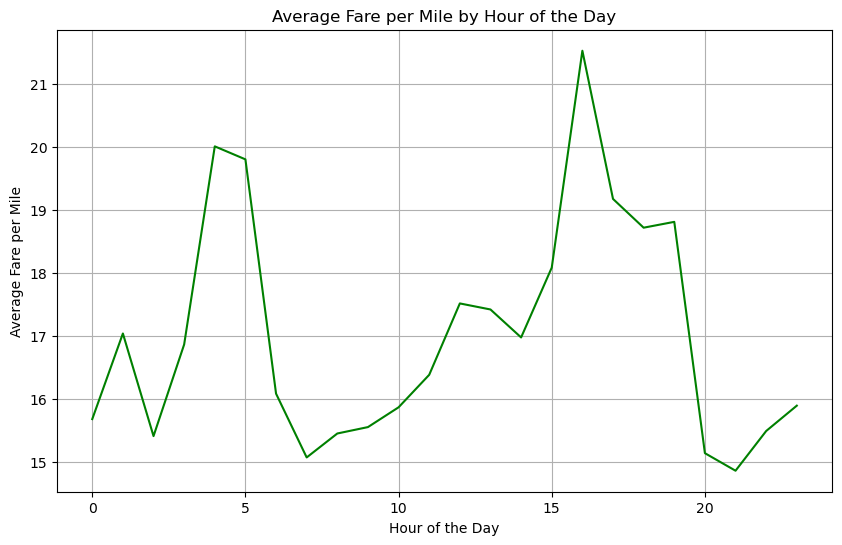

hour
0     15.676985
1     17.037034
2     15.406855
3     16.862659
4     20.010219
5     19.803681
6     16.081475
7     15.067828
8     15.448261
9     15.550081
10    15.864400
11    16.380651
12    17.514653
13    17.418604
14    16.974222
15    18.083230
16    21.529597
17    19.175177
18    18.717964
19    18.810774
20    15.135754
21    14.856841
22    15.487710
23    15.890456
Name: fare_per_mile, dtype: float64


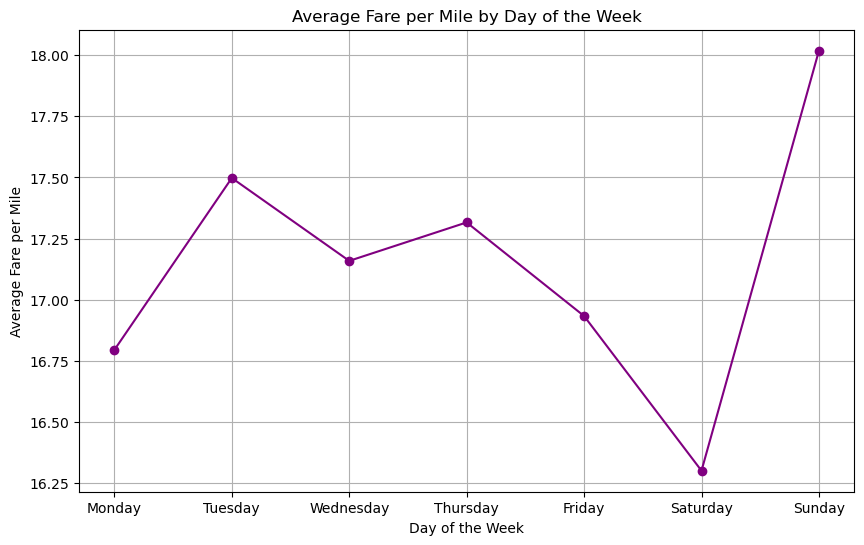

day_of_week
Monday       16.795105
Tuesday      17.497708
Wednesday    17.158966
Thursday     17.316151
Friday       16.933623
Saturday     16.301385
Sunday       18.017780
Name: fare_per_mile, dtype: float64


In [154]:
# Compare the average fare per mile for different days and for different times of the day

#by hour
# Group by hour and calculate average fare per mile
fare_by_hour = taxi_nonzero.groupby('hour')['fare_per_mile'].mean()

# Plot the results
fare_by_hour.plot(kind='line', figsize=(10, 6), color='green')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.grid(True)
plt.show()

print(fare_by_hour)

# Group by day_of_week and calculate average fare per mile
fare_by_day = taxi_nonzero.groupby('day_of_week')['fare_per_mile'].mean()

#  Ensure the days are ordered correctly (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(day_order)

plt.figure(figsize=(10, 6))
fare_by_day.plot(kind='line', marker='o', color='purple')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.grid(True)
plt.show()

# Print the results for reference
print(fare_by_day)



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [155]:
# Compare fare per mile for different vendors
# Group by VendorID and hour and calculate average fare per mile
fare_by_vendor_hour = taxi_nonzero.groupby(['VendorID', 'hour'])['fare_per_mile'].mean()

print(fare_by_vendor_hour)



VendorID  hour
1         0       11.347144
          1       11.757678
          2       11.890375
          3       11.332441
          4       11.557264
          5       10.833209
          6       10.317137
          7       11.401584
          8       12.678723
          9       13.103519
          10      13.102814
          11      13.523933
          12      13.695500
          13      13.595240
          14      13.422058
          15      13.766588
          16      15.228063
          17      15.121301
          18      15.074329
          19      14.135478
          20      12.713209
          21      12.240751
          22      11.732146
          23      11.464072
2         0       16.892549
          1       18.520688
          2       16.426860
          3       18.447724
          4       22.783727
          5       23.422738
          6       18.475383
          7       16.504722
          8       16.498510
          9       16.469078
          10      16.893222
     

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


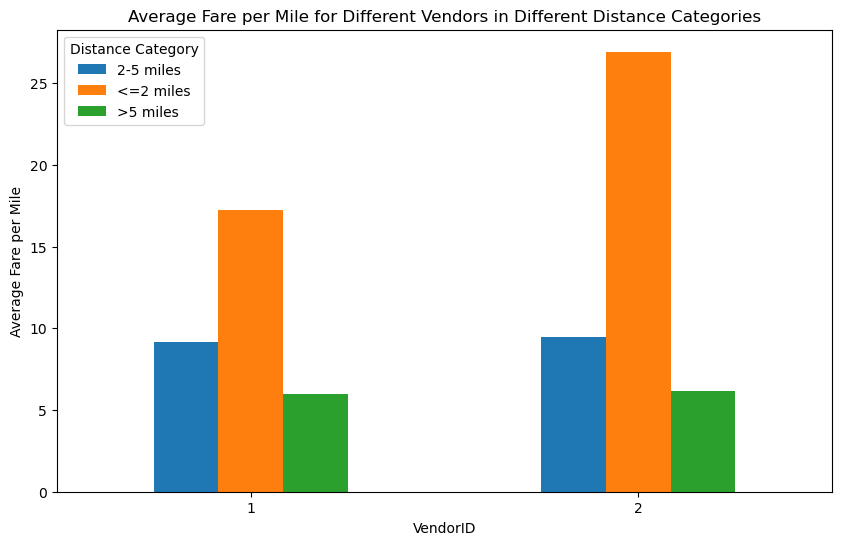

distance_category  2-5 miles  <=2 miles  >5 miles
VendorID                                         
1                   9.182434  17.213030  5.992011
2                   9.491270  26.927722  6.171520


In [156]:
# Defining distance tiers
# Define a function to categorize trip distances
def categorize_distance(distance):
    if distance <= 2:
        return '<=2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

# Apply the function to the 'trip_distance' column
taxi_nonzero['distance_category'] = taxi_nonzero['trip_distance'].apply(lambda x: categorize_distance(x))

# Group by VendorID and distance category and calculate average fare per mile
fare_by_vendor_distance = taxi_nonzero.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().unstack()

# Plot the results
fare_by_vendor_distance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile for Different Vendors in Different Distance Categories')
plt.xlabel('VendorID')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=0)
plt.legend(title='Distance Category', loc='upper left')
plt.show()

print(fare_by_vendor_distance)



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

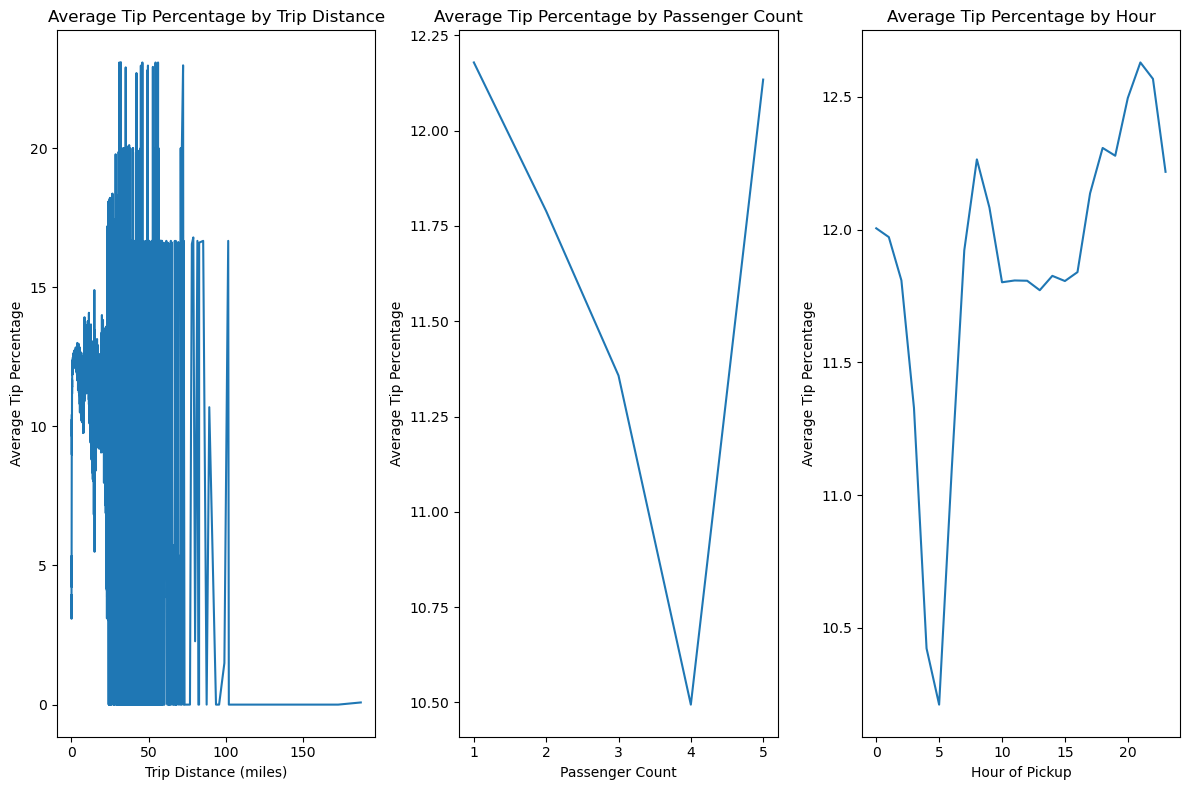

In [157]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
taxi_nonzero['tip_percentage'] = (taxi_nonzero['tip_amount'] / taxi_nonzero['total_amount']) * 100

# Average tip percentage by trip distance
tip_by_distance = taxi_nonzero.groupby('trip_distance')['tip_percentage'].mean()

# Average tip percentage by passenger count
tip_by_passenger = taxi_nonzero.groupby('passenger_count')['tip_percentage'].mean()

# Average tip percentage by hour of pickup
tip_by_hour = taxi_nonzero.groupby('hour')['tip_percentage'].mean()

# Plotting the results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
tip_by_distance.plot(kind='line', title='Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage')

plt.subplot(1, 3, 2)
tip_by_passenger.plot(kind='line', title='Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')

plt.subplot(1, 3, 3)
tip_by_hour.plot(kind='line', title='Average Tip Percentage by Hour')
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Tip Percentage')

plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

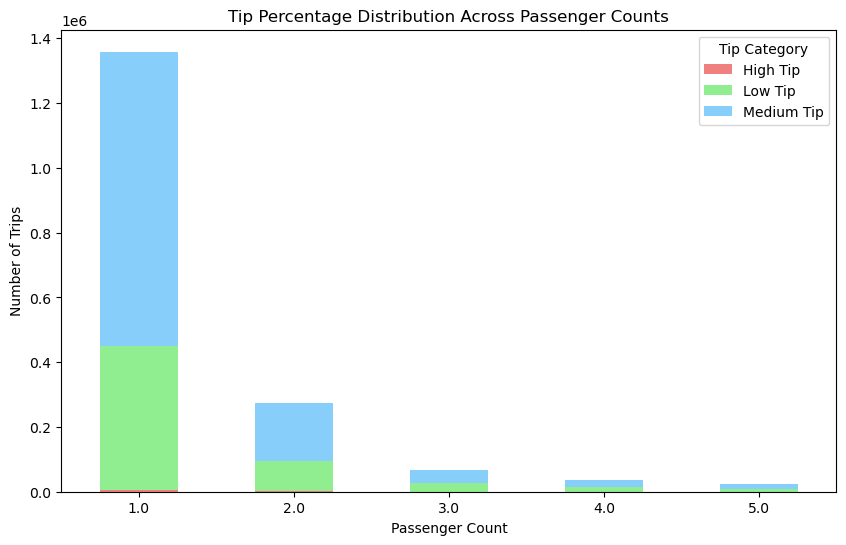

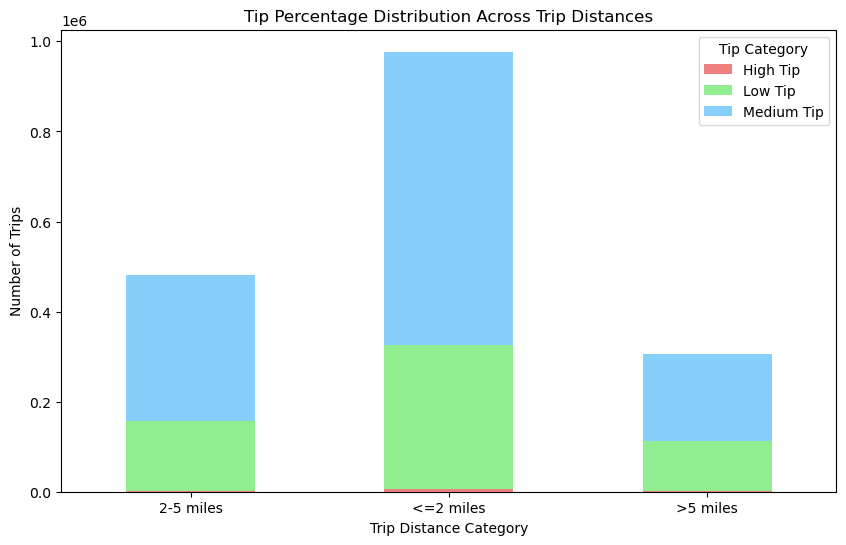

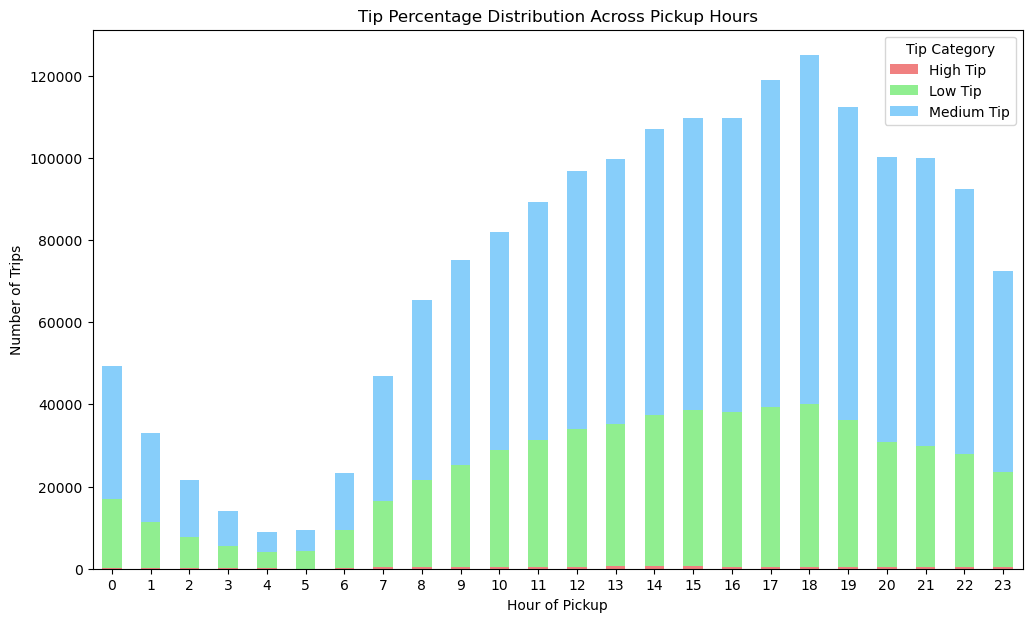

In [158]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for tip category based on tip percentage
taxi_nonzero['tip_category'] = taxi_nonzero['tip_percentage'].apply(lambda x: 'Low Tip' if x < 10 else ('High Tip' if x > 25 else 'Medium Tip'))

# Group by passenger count and tip category to get the count of trips
passenger_tip_summary = taxi_nonzero.groupby(['passenger_count', 'tip_category']).size().unstack().fillna(0)

# Plot the stacked bar chart for passenger count and tip category
passenger_tip_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Tip Percentage Distribution Across Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(title='Tip Category')
plt.show()

# Group by trip distance category (categorize distances as <=2 miles, 2-5 miles, >5 miles) and tip category
conditions = [
    (taxi_nonzero['trip_distance'] <= 2),
    (taxi_nonzero['trip_distance'] > 2) & (taxi_nonzero['trip_distance'] <= 5),
    (taxi_nonzero['trip_distance'] > 5)
]
choices = ['<=2 miles', '2-5 miles', '>5 miles']
taxi_nonzero['distance_category'] = np.select(conditions, choices, default='Unknown')

# Group by distance category and tip category
distance_tip_summary = taxi_nonzero.groupby(['distance_category', 'tip_category']).size().unstack().fillna(0)

# Plot the stacked bar chart for distance category and tip category
distance_tip_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Tip Percentage Distribution Across Trip Distances')
plt.xlabel('Trip Distance Category')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(title='Tip Category')
plt.show()

# Group by hour of pickup and tip category
hour_tip_summary = taxi_nonzero.groupby(['hour', 'tip_category']).size().unstack().fillna(0)

# Plot the stacked bar chart for hour and tip category
hour_tip_summary.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Tip Percentage Distribution Across Pickup Hours')
plt.xlabel('Hour of Pickup')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(title='Tip Category')
plt.show()





**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

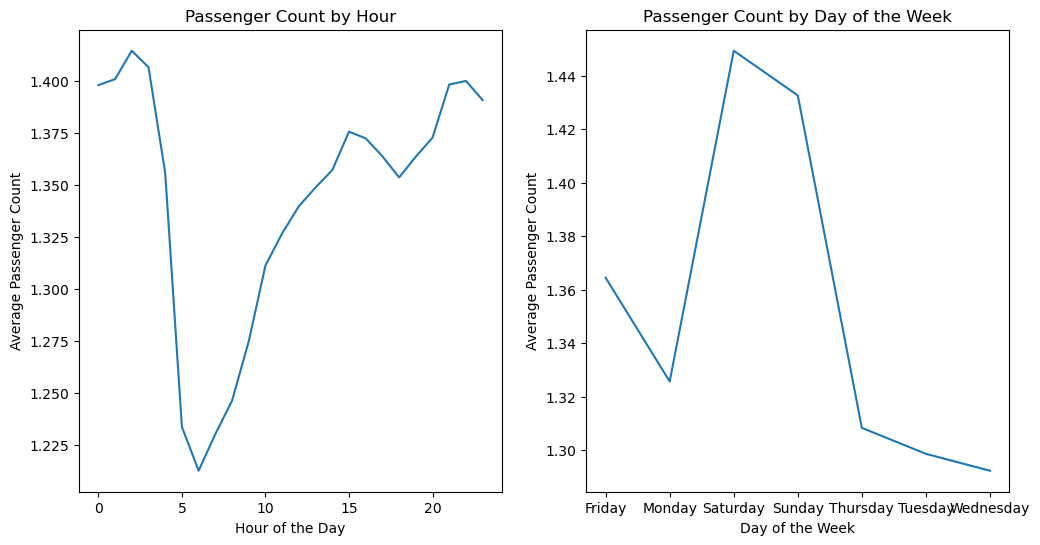

In [159]:
# See how passenger count varies across hours and days

# Variation of passenger count across hours
hourly_passenger_count = taxi_nonzero.groupby('hour')['passenger_count'].mean()

# Variation of passenger count across days of the week
daily_passenger_count = taxi_nonzero.groupby('day_of_week')['passenger_count'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hourly_passenger_count.plot(kind='line', title='Passenger Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')

plt.subplot(1, 2, 2)
daily_passenger_count.plot(kind='line', title='Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')

plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

LocationID
6.0      1.954545
195.0    1.748634
12.0     1.683230
58.0     1.666667
207.0    1.666667
66.0     1.502304
199.0    1.500000
59.0     1.500000
261.0    1.483089
45.0     1.480649
93.0     1.480106
157.0    1.456897
132.0    1.452786
88.0     1.451525
230.0    1.439280
232.0    1.436583
144.0    1.429870
43.0     1.415947
158.0    1.413034
148.0    1.411810
Name: passenger_count, dtype: float64


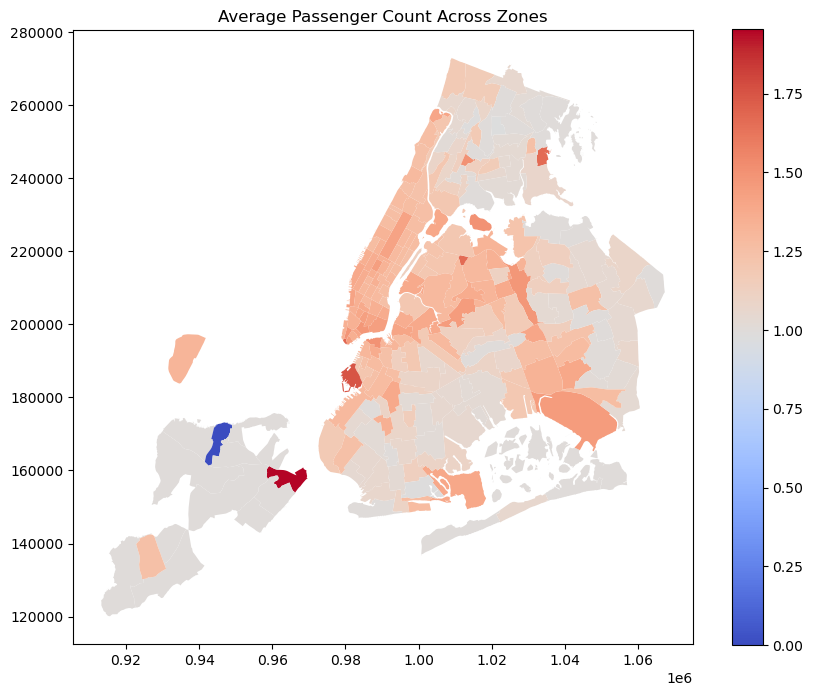

In [160]:
# How does passenger count vary across zones
# Group by PULocationID and calculate average passenger count
zone_passenger_count = taxi_pickup_geo.groupby('LocationID')['passenger_count'].mean()
print(zone_passenger_count.sort_values(ascending=False).head(20))
# Merge with the zones GeoDataFrame to map the zones
zones_passenger_count = zones.merge(zone_passenger_count, on='LocationID', how='left')

# Plotting the passenger count variation across zones
zones_passenger_count.plot(column='passenger_count', cmap='coolwarm', figsize=(10, 8), legend=True)
plt.title('Average Passenger Count Across Zones')
plt.show()




In [161]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

print(zone_passenger_count.sort_values(ascending=False))

LocationID
6.0      1.954545
195.0    1.748634
12.0     1.683230
58.0     1.666667
207.0    1.666667
           ...   
78.0     1.000000
18.0     0.982759
210.0    0.982143
32.0     0.975610
187.0    0.000000
Name: passenger_count, Length: 252, dtype: float64


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [162]:
# Calculate how often extra charges are applied (pickup and dropoff locations)
extra_pickup_frequency = taxi_nonzero.groupby('PULocationID')['extra'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
extra_pickup_frequency = extra_pickup_frequency.rename(columns={'extra': 'extra_applied_ratio'})

extra_dropoff_frequency = taxi_nonzero.groupby('DOLocationID')['extra'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
extra_dropoff_frequency = extra_dropoff_frequency.rename(columns={'extra': 'extra_applied_ratio'})

# Calculate how often congestion surcharge is applied (pickup and dropoff locations)
congestion_pickup_frequency = taxi_nonzero.groupby('PULocationID')['congestion_surcharge'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
congestion_pickup_frequency = congestion_pickup_frequency.rename(columns={'congestion_surcharge': 'congestion_applied_ratio'})

congestion_dropoff_frequency = taxi_nonzero.groupby('DOLocationID')['congestion_surcharge'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
congestion_dropoff_frequency = congestion_dropoff_frequency.rename(columns={'congestion_surcharge': 'congestion_applied_ratio'})

# Display the results for extra charge application frequency
print("Extra Charge Frequency at Pickup Locations:")
print(extra_pickup_frequency.sort_values(by='extra_applied_ratio', ascending=False).head(10))

print("\nExtra Charge Frequency at Dropoff Locations:")
print(extra_dropoff_frequency.sort_values(by='extra_applied_ratio', ascending=False).head(10))

# Display the results for congestion surcharge application frequency
print("\nCongestion Surcharge Frequency at Pickup Locations:")
print(congestion_pickup_frequency.sort_values(by='congestion_applied_ratio', ascending=False).head(10))

print("\nCongestion Surcharge Frequency at Dropoff Locations:")
print(congestion_dropoff_frequency.sort_values(by='congestion_applied_ratio', ascending=False).head(10))


# Calculate how often MTA tax is applied (pickup and dropoff locations)
mta_tax_pickup_frequency = taxi_nonzero.groupby('PULocationID')['mta_tax'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
mta_tax_pickup_frequency = mta_tax_pickup_frequency.rename(columns={'mta_tax': 'mta_tax_applied_ratio'})

mta_tax_dropoff_frequency = taxi_nonzero.groupby('DOLocationID')['mta_tax'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
mta_tax_dropoff_frequency = mta_tax_dropoff_frequency.rename(columns={'mta_tax': 'mta_tax_applied_ratio'})

# Calculate how often improvement surcharge is applied (pickup and dropoff locations)
improvement_surcharge_pickup_frequency = taxi_nonzero.groupby('PULocationID')['improvement_surcharge'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
improvement_surcharge_pickup_frequency = improvement_surcharge_pickup_frequency.rename(columns={'improvement_surcharge': 'improvement_surcharge_applied_ratio'})

improvement_surcharge_dropoff_frequency = taxi_nonzero.groupby('DOLocationID')['improvement_surcharge'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
improvement_surcharge_dropoff_frequency = improvement_surcharge_dropoff_frequency.rename(columns={'improvement_surcharge': 'improvement_surcharge_applied_ratio'})

# Calculate how often airport fee is applied (pickup and dropoff locations)
airport_fee_pickup_frequency = taxi_nonzero.groupby('PULocationID')['airport_fee'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
airport_fee_pickup_frequency = airport_fee_pickup_frequency.rename(columns={'airport_fee': 'airport_fee_applied_ratio'})

airport_fee_dropoff_frequency = taxi_nonzero.groupby('DOLocationID')['airport_fee'].apply(lambda x: (x > 0).sum() / len(x)).reset_index()
airport_fee_dropoff_frequency = airport_fee_dropoff_frequency.rename(columns={'airport_fee': 'airport_fee_applied_ratio'})

# Display the results for MTA tax application frequency
print("MTA Tax Frequency at Pickup Locations:")
print(mta_tax_pickup_frequency.sort_values(by='mta_tax_applied_ratio', ascending=False).head(10))

print("\nMTA Tax Frequency at Dropoff Locations:")
print(mta_tax_dropoff_frequency.sort_values(by='mta_tax_applied_ratio', ascending=False).head(10))

# Display the results for Improvement Surcharge application frequency
print("\nImprovement Surcharge Frequency at Pickup Locations:")
print(improvement_surcharge_pickup_frequency.sort_values(by='improvement_surcharge_applied_ratio', ascending=False).head(10))

print("\nImprovement Surcharge Frequency at Dropoff Locations:")
print(improvement_surcharge_dropoff_frequency.sort_values(by='improvement_surcharge_applied_ratio', ascending=False).head(10))

# Display the results for Airport Fee application frequency
print("\nAirport Fee Frequency at Pickup Locations:")
print(airport_fee_pickup_frequency.sort_values(by='airport_fee_applied_ratio', ascending=False).head(10))

print("\nAirport Fee Frequency at Dropoff Locations:")
print(airport_fee_dropoff_frequency.sort_values(by='airport_fee_applied_ratio', ascending=False).head(10))


Extra Charge Frequency at Pickup Locations:
     PULocationID  extra_applied_ratio
57             59             1.000000
189           199             1.000000
130           138             0.987630
243           255             0.843818
68             70             0.839945
140           148             0.831593
3               4             0.817975
104           112             0.816568
106           114             0.794115
244           256             0.778378

Extra Charge Frequency at Dropoff Locations:
     DOLocationID  extra_applied_ratio
133           138             0.981685
79             80             0.824854
168           173             0.816901
39             40             0.812176
51             52             0.806009
14             15             0.803109
107           112             0.802501
184           189             0.801405
105           109             0.800000
239           245             0.800000

Congestion Surcharge Frequency at Pickup Locations:

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Observations:**

* **Slow Routes Identified:** Certain origin-destination pairs consistently show low average speeds during specific hours (e.g., routes around LocationID 1 at 3–5 PM had speeds < 3 mph).
* **Peak Hours for Traffic:** The busiest hours were 3 PM to 7 PM, with 6 PM being the single busiest hour (126,953 trips in the sample, scaled to ~2.5 million trips).
* **Weekend vs Weekday Differences:** Weekdays saw consistent traffic from 7 AM to 9 AM and 4 PM to 7 PM, while weekends had peaks in late mornings and evenings.

**Recommendations:**

* **Dynamic Routing Engine:** Implement a real-time routing system that learns from past speed data and avoids bottlenecks during specific hours or zones.
* **Pre-emptive Dispatching:** Use hourly pickup trends to proactively allocate taxis to hotspots like Midtown, JFK, and Upper East Side before the demand spike.
* **Idle Cab Redistribution:** Cabs stuck in slow zones (identified from the low-speed routes heatmap) should be dynamically rerouted to nearby higher-speed areas with better throughput.
* **Traffic-Aware Matching:** Integrate average speed profiles by hour and route to better estimate ETAs, improve customer satisfaction, and avoid deadlocks.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Observations:**

* **Top Pickup Zones:** JFK (LocationID 132), Upper East Side South (237), Midtown Center (161) led in trip counts.
* **Nighttime Hotspots:** Zones like LocationID 79, 249, 114 saw significant traffic between 11 PM and 5 AM, contributing to 12% of total revenue.
* **Passenger Count Trends:** Zones like 6.0, 195.0, and 12.0 had higher average passengers per trip, indicating group travel.
* **Tip Trends:** Higher tipping was observed during evening time hours and mid-distance rides, often from event zones or airports.

**Recommendations:**

* **Time-Zone Mapping:** Create a zone-hour matrix showing demand spikes across hours. Example:
    * Midtown (161): High demand on weekdays (9 AM, 5 PM).
    * JFK (132): High demand both day and night.
* **Nighttime Focus:** Allocate cabs to nightlife districts (e.g., zones 79, 68, 230) between 11 PM–2 AM to capitalize on both volume and tip premiums.
* **Passenger Density Allocation:** Position larger vehicles in zones with high avg. passenger count (e.g., LocationID 6.0 and 195.0) to accommodate group rides. Use reinforcement learning models or heuristic-based allocation engines to train models for zone-based dispatching.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Observations:**

* **Fare per Mile Patterns:**
    * Highest during late-night hours (4–6 AM) — over $20/mile.
    * Lower during high-speed mid-day zones — ~$14–15/mile.
* **Vendor Comparison:**
    * Vendor 2 had consistently higher fares per mile across all distance tiers.
    * Vendor 1 showed more uniform pricing, making it more appealing to price-conscious riders.
* **Tip Behavior:**
    * Higher for long-distance and late-night rides.
    * Significantly lower when passenger count exceeds 2.

**Recommendations:**

* **Distance-Tiered Pricing:**
    * Keep current base fare for <2 miles, but add modest surcharges for 2–5 mile and 5+ mile rides to balance tip variation and speed loss.
* **Dynamic Hourly Fare Adjustments:**
    * Implement higher per-mile charges between 4 AM–6 AM and 5 PM–8 PM due to slower traffic and longer trip durations.
* **Vendor Optimization:**
    * Standardize fare logic across vendors to avoid fare disparity. Recommend benchmarking Vendor 2 for premium offerings and Vendor 1 for standard economy rides.
* **Tipping Incentivization:**
    * Suggest displaying suggested tip slabs based on historical tipping behavior by time and distance to nudge behavior.

The goal is to maximize per-trip profitability while ensuring customer retention through transparent, competitive, and value-aligned pricing.